#  Predicting Loan Approval

## 1. Introduction

### 1.1 Project Oveview:

Welcome to the "Bluechip Data & AI 2024 Summit Hackathon: Predicting Loan Creditworthiness." In today’s fast-paced financial landscape, the ability to accurately assess loan applicants’ creditworthiness is essential for making sound lending decisions and effectively managing risk. This hackathon, hosted by Bluechip Technologies, invites data scientists, AI enthusiasts, and technology experts to join a dynamic challenge: creating predictive models that can determine the likelihood of borrowers repaying loans.

This competition provides a unique opportunity to dive into the world of financial analytics and develop models that can transform lending practices by identifying reliable borrowers and reducing default risk. As a participant, you will harness the power of data and artificial intelligence to make impactful predictions, while simultaneously sharpening your machine learning skills and contributing to innovation in financial services.

### 1.2 Business Problem

Financial institutions face the ongoing challenge of minimizing risk in lending. When assessing loan applications, they must differentiate between borrowers likely to repay and those at higher risk of default. Traditional credit scoring models, while useful, can overlook certain patterns in data, potentially leading to misclassified applicants. This hackathon aims to develop machine learning models that go beyond traditional credit scoring, using advanced data-driven approaches to better identify borrowers with high creditworthiness. By improving risk assessment, financial institutions can lend more confidently and reduce default-related losses.

### 1.3 Objective

The primary objective of this hackathon is to develop an accurate and robust machine learning model to predict a borrower’s creditworthiness. The goal is to identify individuals who are most likely to repay their loans, thus helping financial institutions manage their loan portfolios more effectively. Participants will be judged on their model’s predictive accuracy, approach to feature engineering, and their ability to balance precision and recall to reduce misclassification costs.

### 1.4 Evaluation Metric

The core metric for evaluating model performance in this competition is `Accuracy` — the proportion of correct predictions made by the model. While accuracy is essential, participants are also encouraged to consider other metrics such as Precision and Recall to address the trade-offs inherent in predicting loan repayment accurately.

## 2. Dependencies


In [49]:
# Basic Libraries
import pandas as pd
import numpy as np
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import resample

# For data manipulation
import pandas as pd
import numpy as np

# For splitting the data
from sklearn.model_selection import train_test_split

# For resampling (handling class imbalance)
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

# For scaling numeric features
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# import xgboost as xgb

# # Configurations (optional)
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')



## 3. Data Understanding

### 3.1 Data Overview

The dataset (both train and test) was generated and synthesised from Loan Application Dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

#### Files
* train.csv - the training dataset; Loan_Status is the binary target
* test.csv - the test set; your objective is to predict Loan_Status
* sample_submission.csv - a sample submission file in the correct format

### 3.2 Data Dictionary



The train contains 14 features and 1 target. They are listed below:

1. ID: Unique ID for each observation
2. Loan_ID: A unique loan ID.
3. Gender: Either male or female.
4. Married: Weather Married(yes) or Not Marttied(No).
5. Dependents: Number of persons depending on the client.
6. Education: Applicant Education(Graduate or Undergraduate).
7. Self_Employed: Self-employed (Yes/No).
8. ApplicantIncome: Applicant income.
9. CoapplicantIncome: Co-applicant income.
10. LoanAmount: Loan amount in thousands.
11. Loan_Amount_Term: Terms of the loan in months.
12. Credit_History: Credit history meets guidelines.
13. Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
14. Total_Incom: Not defined
14. Loan_Status: Loan approved (Y/N)

### 3.3 Business significance

## 4. EDA

### 4.1 Data Inspection

In [99]:
# Inspecting the data

train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

train = train[train['Loan_Status'] == 0]


In [100]:
for col in train.columns:
    print(f'{col}: {train[col].unique()}')

ID: [79428 70497 55554 51055 82924 82637 60419 49155 36073 50224 71389 42111
 16419 94297 52424 47433 70027 80376 12241 72954 66248 28968 30976 29204
 14463 26493 57434 85862 67588 12394 14106 91440 29134 59158 16703 47048
 99945 66845 97774 39359 58064 34298 68377 89358 29629 51284 36877 48211
 59997 56580 40874 56159 62273 68578 87775 13817 17290 15450 52841 10111
 92644 81648 22750 70990 15799 19580 40408 23600 23286 31552 41224 19855
 99576 76441 74275 33697 64461 42398 45426 32406 60619 61424 91073 26764
 33469 15879 54585 25588 29232 26484 35698 87024 35385 82629 67095 44264
 90752 52029 82247 57398 98241 66341 46915 77411 48159 76397 11302 34001
 76207 99806 73872 54999 82772 12353 16665 78134 79367 37902 58429 20733
 16122 95147 95987 62166 68331 56434 79546 18702 79247 57742 58262 55503
 77339 13532 29193 89648 63976 37852 45903 66946 10672 84534 46084 83179
 75700 94407 12481 86132 70928 41046 81171 28317 44372 58800 96402 98411
 90614 39690 39758 74060 64477 79167 10562 1719

In [101]:
train['Loan_Status'].value_counts()

Loan_Status
0    985
Name: count, dtype: int64

##### Plan: 
Use the .head() method of the pandas dataframe class to see the first 5 rows of the train and test dataset and visually assess the structure of the data.

In [102]:
# viewing the first 5 rows of the train data 
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
28,55554,LP002187,1,0,2,0,0,13464,0.000000,146,367,0,1,0,6000
43,51055,LP002585,1,1,1,0,0,5214,0.000000,40,361,1,0,0,6000
50,82924,LP002368,1,1,0,0,0,8279,0.000000,50,372,1,1,0,3750


In [103]:
# viewing the first 5 rows of the test data
test.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


Observation:

1. All columns seem to already be in numbers including non-numeric columns
2. The Loan_ID columns is of no values as it is said to house unique loan identification numbers
3. The test dataset does not include the target - Loan_Status

Action ToDos based on observation.

1.   split the train data into a train-val-test set.

##### Plan:

use the .info() method to check the datatypes of the respective features

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 5896
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 985 non-null    int64  
 1   Loan_ID            985 non-null    object 
 2   Gender             985 non-null    int64  
 3   Married            985 non-null    int64  
 4   Dependents         985 non-null    object 
 5   Education          985 non-null    int64  
 6   Self_Employed      985 non-null    int64  
 7   ApplicantIncome    985 non-null    int64  
 8   CoapplicantIncome  985 non-null    float64
 9   LoanAmount         985 non-null    int64  
 10  Loan_Amount_Term   985 non-null    int64  
 11  Credit_History     985 non-null    int64  
 12  Property_Area      985 non-null    int64  
 13  Loan_Status        985 non-null    int64  
 14  Total_Income       985 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 123.1+ KB


In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2528 non-null   int64  
 1   Loan_ID            2528 non-null   object 
 2   Gender             2528 non-null   int64  
 3   Married            2528 non-null   int64  
 4   Dependents         2528 non-null   object 
 5   Education          2528 non-null   int64  
 6   Self_Employed      2528 non-null   int64  
 7   ApplicantIncome    2528 non-null   int64  
 8   CoapplicantIncome  2528 non-null   float64
 9   LoanAmount         2528 non-null   int64  
 10  Loan_Amount_Term   2528 non-null   int64  
 11  Credit_History     2528 non-null   int64  
 12  Property_Area      2528 non-null   int64  
 13  Total_Income       2528 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 276.6+ KB


Observation:

1. `Loan_ID` and `Dependents` have  `object` datatypes. The Loan_ID colum will be dropped as it is defined as a unique identification of the loands. The Dependents feature however, will need further investigations as it should specify the number of dependents per applicant.

2. The binary columns are all int64 which might consume more memory but that is fine since we are dealing with only 5 million columns. 

Action ToDos based on observation.

1. Drop the Loan_ID column
2. split the train data into a train-val-test set.

##### Plan:

Use the .describe method of the DataFrame class to furher investigate the dataset.

In [106]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,985.0,NaN,NaN,NaN,54244.458883,25837.775013,10057.0,32320.0,53581.0,76181.0,99955.0
Loan_ID,985,171,LP002585,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,985.0,NaN,NaN,NaN,0.913706,0.280941,0.0,1.0,1.0,1.0,1.0
Married,985.0,NaN,NaN,NaN,0.860914,0.346212,0.0,1.0,1.0,1.0,1.0
Dependents,985,4,0,587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,985.0,NaN,NaN,NaN,0.127919,0.334169,0.0,0.0,0.0,0.0,1.0
Self_Employed,985.0,NaN,NaN,NaN,0.103553,0.304835,0.0,0.0,0.0,0.0,1.0
ApplicantIncome,985.0,NaN,NaN,NaN,7970.462944,10302.498601,150.0,1991.0,6829.0,8386.0,81000.0
CoapplicantIncome,985.0,NaN,NaN,NaN,1283.28026,2303.255424,0.0,0.0,172.352384,2030.041199,20000.0
LoanAmount,985.0,NaN,NaN,NaN,94.033503,97.373213,17.0,17.0,39.0,171.0,565.0


In [107]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2528.0,NaN,NaN,NaN,55348.986551,26098.461169,10001.0,32297.25,55979.0,77562.25,99931.0
Loan_ID,2528,338,LP002187,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,2528.0,NaN,NaN,NaN,0.916139,0.277234,0.0,1.0,1.0,1.0,1.0
Married,2528.0,NaN,NaN,NaN,0.833465,0.372634,0.0,1.0,1.0,1.0,1.0
Dependents,2528,4,0,1574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,2528.0,NaN,NaN,NaN,0.118671,0.323465,0.0,0.0,0.0,0.0,1.0
Self_Employed,2528.0,NaN,NaN,NaN,0.103244,0.304337,0.0,0.0,0.0,0.0,1.0
ApplicantIncome,2528.0,NaN,NaN,NaN,7712.30182,8653.011599,150.0,2426.25,7051.5,8380.25,81000.0
CoapplicantIncome,2528.0,NaN,NaN,NaN,1262.994361,2288.564517,0.0,0.0,167.431656,1855.758084,20000.0
LoanAmount,2528.0,NaN,NaN,NaN,96.474684,105.096113,17.0,17.0,36.0,171.0,700.0


Observation:

1. `Loan_ID` feature is not all unique but has a very high number of unique values. Would investigate its usefulness but best option remains to drop the column
2. The dependents feature contains only 4 unique values with 0 taking the top spot. Will need to investigate the unique values and then convert the feature into a numeric datatype.

Action ToDos based on observation.

1. Drop the Loan_ID column
2. Convert the `Dependents` feature into a numeric datatype
3. split the train data into a train-val-test set.

In [108]:
train.isna().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [109]:
test.isna().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64

### 4.2 Univariate Exploration


##### Investigating the 'Gender' Feature

Plan: 
1. .unique() to see unique values
2. do a countplot to visualise the balance/imbalance between the unique values

In [110]:
train['Gender'].unique()

array([1, 0])

<Axes: xlabel='count', ylabel='Gender'>

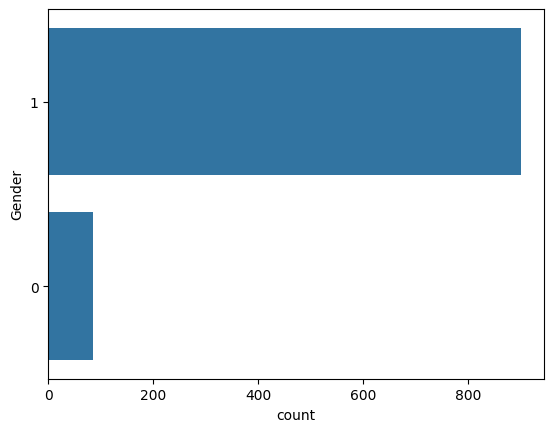

In [111]:
sns.countplot(data=train['Gender'].astype('str'))

Observation:

1. contains discrete variables with a few unique values
2. there are 2 unique values, mostly depicting male and female
3. there is a balace in observations.

Action ToDos based on observation.

1. Drop the Loan_ID column
2. Convert the `Dependents` feature into a numeric datatype
3. split the train data into a train-val-test set.

##### Investigating 'Married' Feature:

Plan: 
1. .unique() to see unique values
2. do a countplot to visualise the balance/imbalance between the unique values

In [112]:
train['Married'].unique()

array([1, 0])

<Axes: xlabel='count', ylabel='Married'>

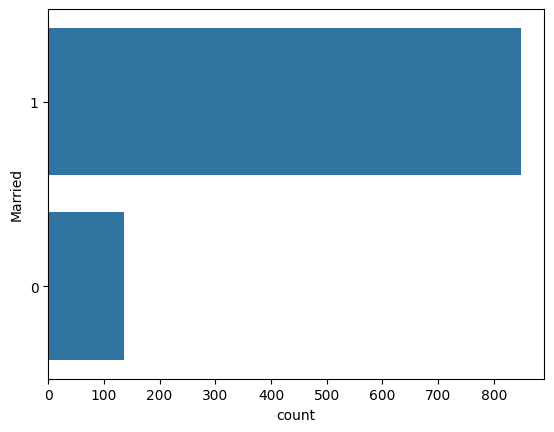

In [113]:
sns.countplot(data=train['Married'].astype('str'))

##### Investigating the 'Dependents' feature:

use the .unique method to investigate the unique values of the `Dependent` features.

In [114]:
train['Dependents'].unique()

array(['0', '2', '1', '3+'], dtype=object)

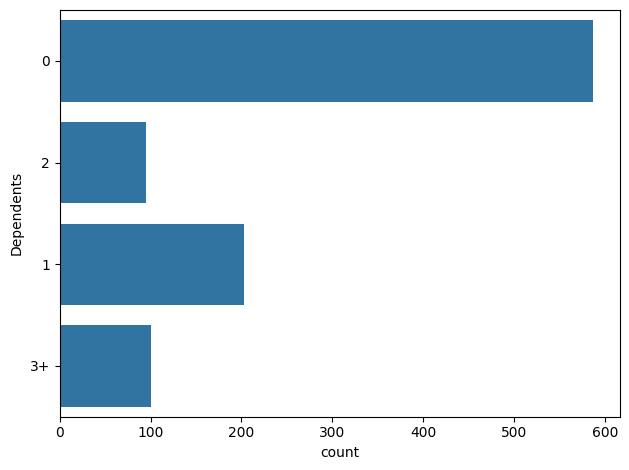

In [115]:
sns.countplot(data = train['Dependents'])
plt.tight_layout()

Observation: 

1. 3+ is the issue here.
2. There is a balance between the the different classes in the data

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. split the train data into a train-val-test set.

##### Investigating the 'Education' feature

Plan: 
1. .unique() to see unique values
2. do a countplot to visualise the balance/imbalance between the unique values

In [116]:
train['Education'].unique()

array([0, 1])

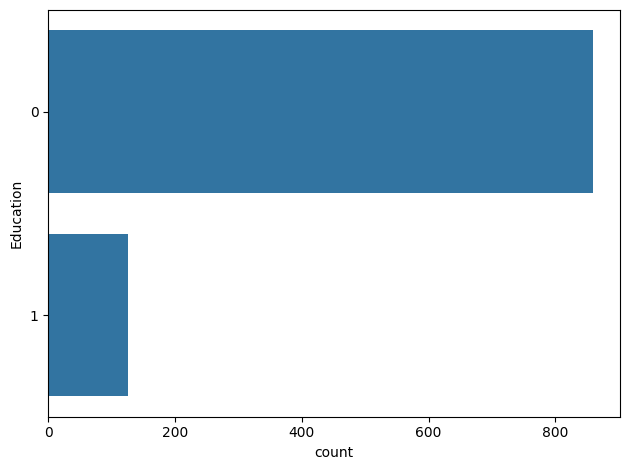

In [117]:
sns.countplot(data = train['Education'].astype('str'))
plt.tight_layout()

Observation:

1. binary responses
2. approximately even distribution of values

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. split the train data into a train-val-test set.

##### Investigating the 'Self_Employed' feature

Plan: 
1. .unique() to see unique values
2. do a countplot to visualise the balance/imbalance between the unique values

In [118]:
train['Self_Employed'].unique()

array([0, 1])

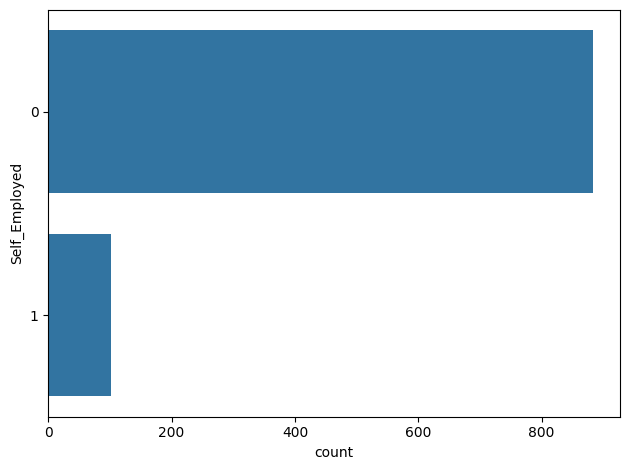

In [119]:
sns.countplot(data = train['Self_Employed'].astype('str'))
plt.tight_layout()

Observation:

1. binary responses
2. approximately even distribution of values

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. split the train data into a train-val-test set.

##### Investigating the 'ApplicantIncome' feature

knowledge brought forward from data inspection sections tells us that this feature is continous and has a minimum value of 150 and a maximum value of 81000. this is quite a large interval and may cause issues in our non-tree models.

Plan

1. Check the distribution using a histogram
2. if the distribution is skewed, are there transformations that could better redistribute the values, this is important for linear models as they are affected by scale and distributions but for tree based models not so important


In [120]:
ai_log = stats.boxcox(train['ApplicantIncome'], lmbda=0) # this creates a log transformation
ai_bc, ai_params = stats.boxcox(train['ApplicantIncome']) # this creates a box cox transformation
train['ai_log'] = ai_log # this adds the trasformations as features in the train dataframe
train['ai_bc'] = ai_bc # this adds the trasformations as features in the train dataframe

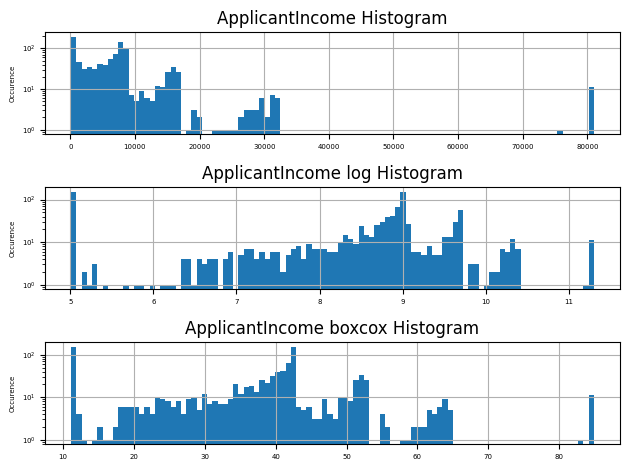

In [121]:
# Creating a visualisation of the original distribution, the log and the box cox transformation

fig, (ax1, ax2, ax3) = plt.subplots(3,1)

train['ApplicantIncome'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=5)
ax1.set_title('ApplicantIncome Histogram')
ax1.set_xlabel('')
ax1.set_ylabel('Occurence', fontsize=5)

train['ai_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=5)
ax2.set_title('ApplicantIncome log Histogram')
ax2.set_xlabel('')
ax2.set_ylabel('Occurence', fontsize=5)

train['ai_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=5)
ax3.set_title('ApplicantIncome boxcox Histogram')
ax3.set_xlabel('')
ax3.set_ylabel('Occurence', fontsize=5)

plt.tight_layout()

Observation

1. the distribution of values shows a heavy right with most values peaking at < 35K while the outliers reach values of 80K+
2. the distribution showed multiple peaks at 0, ~19K, ~16K, ~32K, and ~81K.
3. the log transformation appears to show a much better spread of the data.  

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log and box cox transformation to the `ApplicantIncome` feature to create additional features
4. split the train data into a train-val-test set.

##### Investigating the 'CoapplicantIncome' feature

knowledge brought forward from the data inspection section above tells us that this feature has a minimum value of 0 and a maximum value of 20000. since box cox transformations and log tranformations cause errors at 0 data points we would need to shift the entire dataset by a coefficient. In this case, I will shift the entire dataset by 10 units.

Plan

1. Add 10 to the entire feature to shift it 1 unit
2. check the number of unique variables and the variable type, we know it is numeric but is it continous or discrete
3. Check the distribution using a histogram
4. if the distribution is skewed, are there transformations that could better redistribute the values, this is important for linear models as they are affected by scale and distributions but for tree based models not so important


In [122]:
train_ = pd.read_csv('data/Train.csv')

train['CoapplicantIncome'] = train_['CoapplicantIncome'] + 1 # to shift the data points by 10 to avoid 0 transformation errors

print(f"Unique values: {train['CoapplicantIncome'].unique()}\nNumber of unique values: {train['CoapplicantIncome'].nunique()}")

cai_log = stats.boxcox(train['CoapplicantIncome'], lmbda=0) # log transformation
cai_bc, cai_params = stats.boxcox(train['CoapplicantIncome']) # box cox tranformation and the assigned value of lambda
train['cai_log'] = cai_log # adding the log transformation as a feature
train['cai_bc'] = cai_bc # adding the box cox transformation as a feature

Unique values: [3.85845878e+03 3.15472511e+02 1.00000000e+00 7.20801663e+02
 3.51135092e+02 2.84499054e+02 4.12178628e+03 3.89450224e+03
 1.42393770e+03 4.28095341e+03 2.63127167e+02 7.08429538e+02
 2.86561504e+03 1.84602372e+03 9.98826563e+02 3.72140425e+02
 3.85103390e+02 3.86775823e+03 3.52247734e+03 3.71087019e+03
 5.35976372e+02 2.96454517e+02 1.67460828e+03 2.13282742e+03
 2.97719198e+03 5.43069811e+02 6.77928904e+02 4.23262164e+03
 1.30350195e+03 1.54518746e+02 3.89901014e+03 1.05740189e+03
 5.16342347e+02 7.13009114e+02 2.57153821e+02 6.23130973e+02
 2.87117800e+03 3.80554770e+03 4.28741541e+02 9.40476310e+03
 2.51902146e+01 1.19365717e+03 4.21001533e+03 2.57663562e+03
 4.97572927e+02 6.96264423e+02 6.46580843e+02 3.02622722e+03
 1.81684963e+03 2.84735001e+01 4.53384675e+02 1.02693179e+02
 1.90680657e+02 2.39879658e+02 3.73034742e+02 6.60882169e+01
 1.31184931e+03 8.63270855e+02 2.06990052e+01 6.88736425e+02
 2.43717798e+02 2.54446253e+03 4.81640728e+02 2.54857766e+02
 7.135539

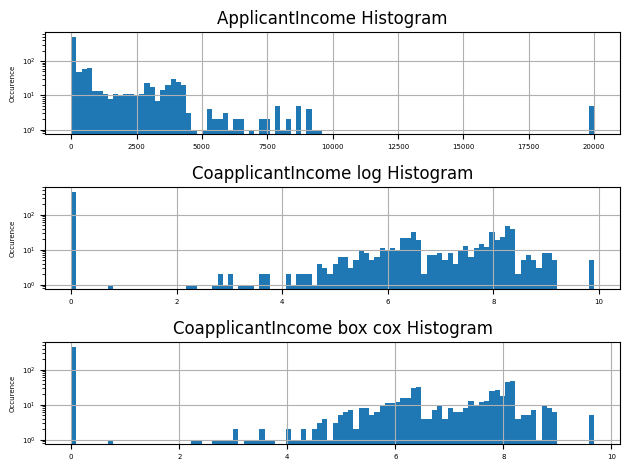

In [123]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

train['CoapplicantIncome'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=5)
ax1.set_title('ApplicantIncome Histogram')
ax1.set_xlabel('')
ax1.set_ylabel('Occurence', fontsize=5)

train['cai_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=5)
ax2.set_title('CoapplicantIncome log Histogram')
ax2.set_xlabel('')
ax2.set_ylabel('Occurence', fontsize=5)

train['cai_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=5)
ax3.set_title('CoapplicantIncome box cox Histogram')
ax3.set_xlabel('')
ax3.set_ylabel('Occurence', fontsize=5)

plt.tight_layout()

Observations:

1. the feature exibits a stepped right skew
2. the box cox transformation and the log transformation show very similar distributions with better spead of the data

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log and box cox transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log and box cox transformation to the `CoapplicantIncome` feature to create additional features
6. split the train data into a train-val-test set.

##### Investigating the 'LoanAmount' feature

knowledge brought forward tells us that this feature is numeric and appears discrete with a min value of 17, and a max value of 700.

Plan

1. Check the distribution using a histogram
2. if the distribution is skewed, are there transformations that could better redistribute the values, this is important for linear models as they are affected by scale and distributions but for tree based models not so important


In [124]:
la_log = stats.boxcox(train['LoanAmount'], lmbda=0) # this creates a log transformation
la_bc, ai_params = stats.boxcox(train['LoanAmount']) # this creates a box cox transformation
train['la_log'] = la_log # this adds the trasformations as features in the train dataframe
train['la_bc'] = la_bc # this adds the trasformations as features in the train dataframe

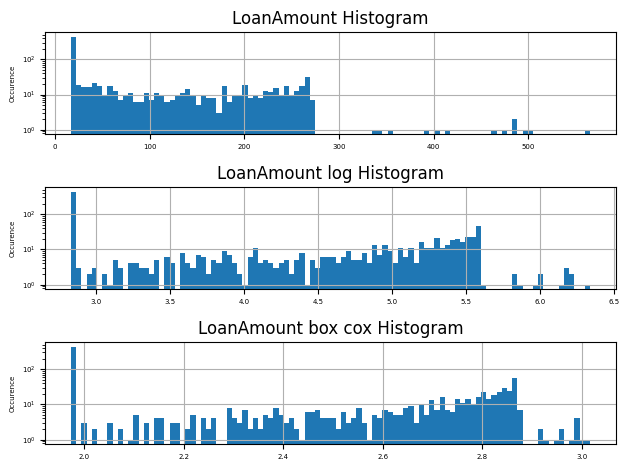

In [125]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

train['LoanAmount'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=5)
ax1.set_title('LoanAmount Histogram')
ax1.set_xlabel('')
ax1.set_ylabel('Occurence', fontsize=5)

train['la_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=5)
ax2.set_title('LoanAmount log Histogram')
ax2.set_xlabel('')
ax2.set_ylabel('Occurence', fontsize=5)

train['la_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=5)
ax3.set_title('LoanAmount box cox Histogram')
ax3.set_xlabel('')
ax3.set_ylabel('Occurence', fontsize=5)

plt.tight_layout();

Observations:

1. the feature exibits a stepped right skew
2. the box cox transformation and the log transformation show very similar distributions with better spead of the data

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log and box cox transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log and box cox transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log and box cox transformation to the `LoanAmount` feature to create additional features
7. split the train data into a train-val-test set.

##### Investigation of the 'Loan_Amount_Term' feature

knowledge brought forward tells us that this feature is numeric and appears discrete with a min value of 12, and a max value of 480.

Plan

1. Check the distribution using a histogram
2. if the distribution is skewed, are there transformations that could better redistribute the values, this is important for linear models as they are affected by scale and distributions but for tree based models not so important


In [126]:
lat_log = stats.boxcox(train['Loan_Amount_Term'], lmbda=0) # this creates a log transformation
lat_bc, ai_params = stats.boxcox(train['Loan_Amount_Term']) # this creates a box cox transformation
train['lat_log'] = lat_log # this adds the trasformations as features in the train dataframe
train['lat_bc'] = lat_bc # this adds the trasformations as features in the train dataframe

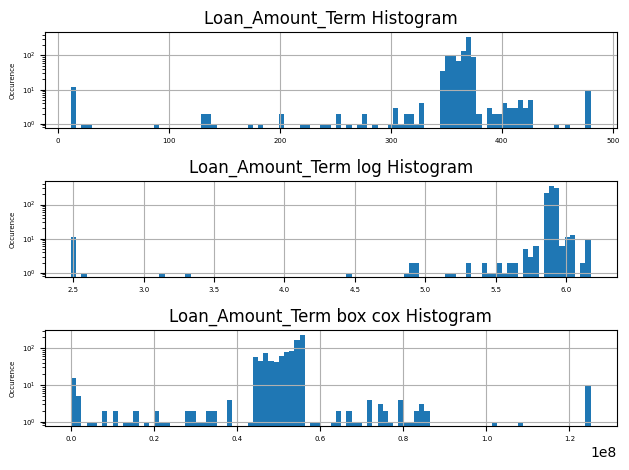

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

train['Loan_Amount_Term'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=5)
ax1.set_title('Loan_Amount_Term Histogram')
ax1.set_xlabel('')
ax1.set_ylabel('Occurence', fontsize=5)

train['lat_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=5)
ax2.set_title('Loan_Amount_Term log Histogram')
ax2.set_xlabel('')
ax2.set_ylabel('Occurence', fontsize=5)

train['lat_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=5)
ax3.set_title('Loan_Amount_Term box cox Histogram')
ax3.set_xlabel('')
ax3.set_ylabel('Occurence', fontsize=5)

plt.tight_layout();

Observation:

1. The feature seems to exibit more of a left skew.
2. the box cox transformation centralises the distribution to more of a centralised bell curve

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. split the train data into a train-val-test set.

##### Iinvestigate the 'Credit_History'

knowledge brought forward tells us that this feature is numeric and to be ninary.

Plan

1. use a countplot to visualise the balance or imbalance between the classes

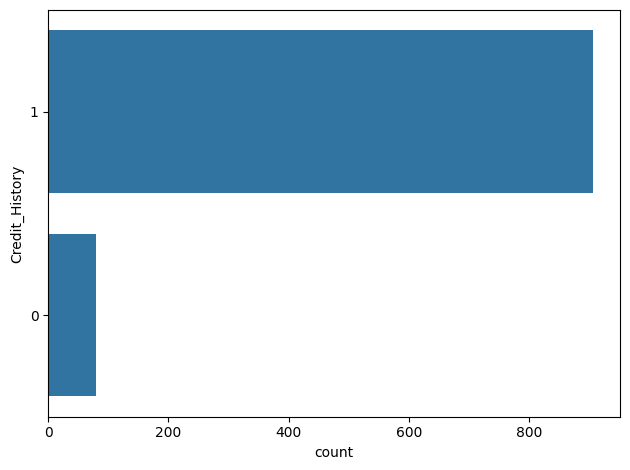

In [128]:
sns.countplot(data = train['Credit_History'].astype('str'))
plt.tight_layout()

Observation:

1. binary responses
2. approximately even distribution of values

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. split the train data into a train-val-test set.

##### Investigating the 'Property_Area' feature.

From knowledge brought forward, we see that this feature is numeric and has a minimum value of 0 and a max value of 2. 

Plan:

1. Use a countplot to visualise distribution between the classes

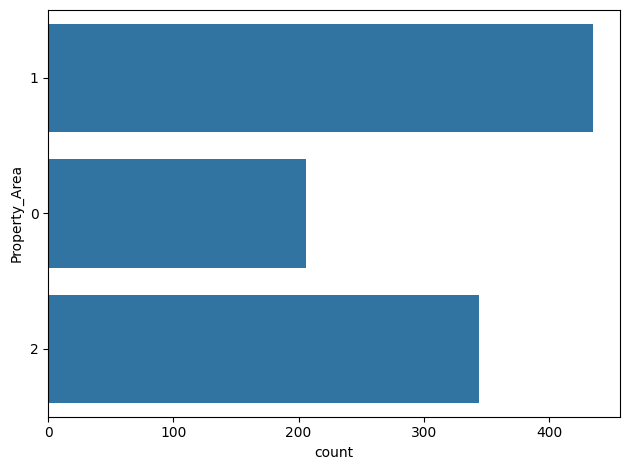

In [129]:
sns.countplot(data = train['Property_Area'].astype('str'))
plt.tight_layout()

Observation:

1. only 3 values, would need to do a bivariate analysis between this feature and the target to understand the relationship and see it requires a transformation
2. approximately even distribution of values

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. split the train data into a train-val-test set.

##### Investigating the 'Total_Income'

knowledge brought forward from data inspection sections tells us that this feature is numeric and has a minimum value of 1963 and a maximum value of 22500. this is quite a large interval and may cause issues in our non-tree models.

Plan

1. Check the distribution using a histogram
2. if the distribution is skewed, are there transformations that could better redistribute the values, this is important for linear models as they are affected by scale and distributions but for tree based models not so important


In [130]:
ti_log = stats.boxcox(train['Total_Income'], lmbda=0) # this creates a log transformation
ti_bc, ai_params = stats.boxcox(train['Total_Income']) # this creates a box cox transformation
train['ti_log'] = ai_log # this adds the trasformations as features in the train dataframe
train['ti_bc'] = ai_bc # this adds the trasformations as features in the train dataframe

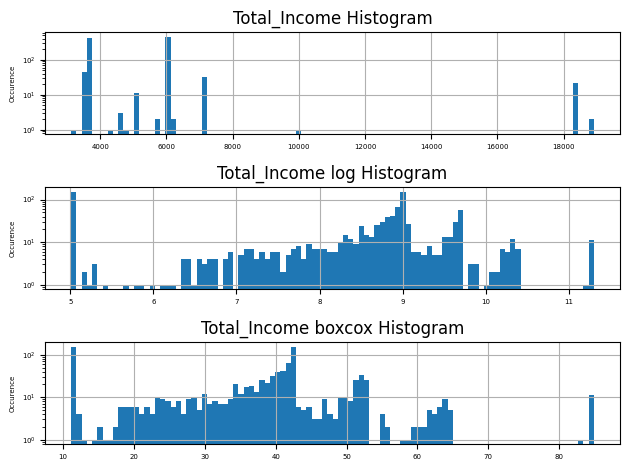

In [131]:
# Creating a visualisation of the original distribution, the log and the box cox transformation

fig, (ax1, ax2, ax3) = plt.subplots(3,1)

train['Total_Income'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=5)
ax1.set_title('Total_Income Histogram')
ax1.set_xlabel('')
ax1.set_ylabel('Occurence', fontsize=5)

train['ti_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=5)
ax2.set_title('Total_Income log Histogram')
ax2.set_xlabel('')
ax2.set_ylabel('Occurence', fontsize=5)

train['ti_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=5)
ax3.set_title('Total_Income boxcox Histogram')
ax3.set_xlabel('')
ax3.set_ylabel('Occurence', fontsize=5)

plt.tight_layout()

Observation

1. the data is right skewed and and not very well spread
2. the log transformation seems best in this case.

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. Apply a log transformation to the `Total_Income` feature to create additional features
9. split the train data into a train-val-test set.

##### Investigating the Target - 'Loan_Status' 

Knowledge brought forward tells us that this feature is numeric with a minimum value of 0 and a maximum value of 1.

Plan:

1. use a countplot to obseve the distribution of values.

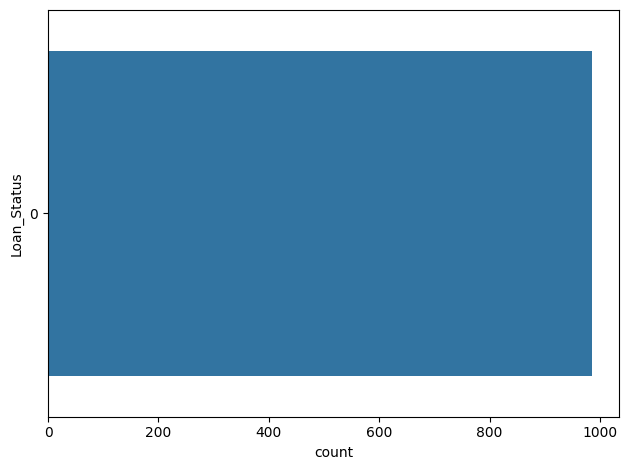

In [132]:
sns.countplot(data = train['Loan_Status'].astype('str'))
plt.tight_layout()

Observation

1. the target is binary
2. there is a major imbalance between target classes


Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. Apply a log transformation to the `Total_Income` feature to create additional features
9. split the train data into a train-val-test set.
10. Perform resampling of the minority class after the split using SMOTE

### 4.3 Bivariate Exploration


In  beginning our bivariate exploration I would first do a correlation between the various features and the target to measure the strenght of the relationship between them.

##### Investigating 'Gendar' vs 'Loan_Status'

Knowledge brought forward tells us that both Gender and Loan_Status are highly imbalanced accross their respective unique values. Also we know that they both contain binary data types and 

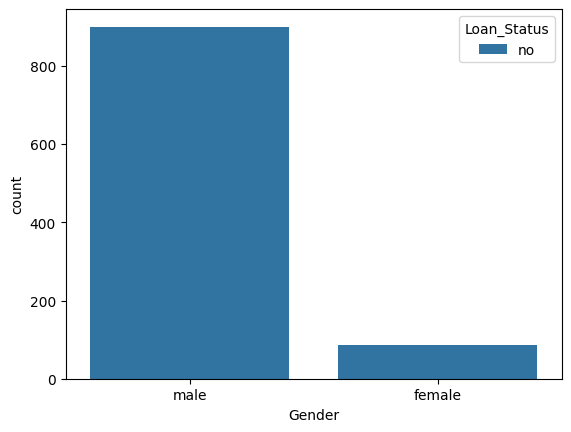

In [133]:
# creating a dataset with the interpretation of the 1s and 0s to give meaning
gender_Loan = train[['Gender', 'Loan_Status']]
gender_mapping = {1: 'male', 0: 'female'} # making the assumption that 0 is female and 1 is male
loan_stat_maps = {1: 'yes', 0: 'no'}

def replace_gen(x):
    return gender_mapping[x]

def replace_loanstatus(x):
    return loan_stat_maps[x]

gender_Loan['Gender'] = gender_Loan['Gender'].apply(replace_gen)
gender_Loan['Loan_Status'] = gender_Loan['Loan_Status'].apply(replace_loanstatus)

sns.countplot(data=gender_Loan,x='Gender', hue='Loan_Status');

In [134]:
loan_status_by_gender = gender_Loan.groupby(['Gender', 'Loan_Status'])[['Loan_Status']].count()
loan_status_by_gender.rename(columns={'Loan_Status': 'Count'}, inplace=True)
loan_status_by_gender.reset_index(inplace=True)
loan_status_by_gender.head()

,Gender,Loan_Status,Count
0,female,no,85
1,male,no,900


In [135]:
a = float(loan_status_by_gender['Count'][0]/(loan_status_by_gender['Count'][1]))
b = float(loan_status_by_gender['Count'][2]/(loan_status_by_gender['Count'][3]))
print(f'The ratio of no to yes in males is: {a}')
print(f'The ratio of no to yes in females is: {b}')

KeyError: 2

Observation:

1. There is an approximate amount for rejection to approval regardless of gender (~0.2)
2. From the image it is not clear to see if being a male or a female has any impact on a loans outcome.

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. Apply a log transformation to the `Total_Income` feature to create additional features
9. split the train data into a train-val-test set.
10. Perform resampling of the minority class after the split using SMOTE
11. Might need to drop the gender column as it seems to have no effect on if a loan is rejected or approved.

In [136]:
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ai_log,ai_bc,cai_log,cai_bc,la_log,la_bc,lat_log,lat_bc,ti_log,ti_bc
1,79428,LP001448,1,1,0,0,0,150,3858.458782,188,370,1,1,0,6000,5.010635,11.148899,8.258023,8.098014,5.236442,2.788539,5.913503,5.426780e+07,5.010635,11.148899
2,70497,LP002231,0,0,0,0,0,4989,315.472511,17,348,1,0,0,6000,8.514991,36.369023,5.754072,5.676078,2.833213,1.973950,5.852202,4.457749e+07,8.514991,36.369023
28,55554,LP002187,1,0,2,0,0,13464,1.000000,146,367,0,1,0,6000,9.507775,49.444762,0.000000,0.000000,4.983607,2.725724,5.905362,5.286850e+07,9.507775,49.444762
43,51055,LP002585,1,1,1,0,0,5214,1.000000,40,361,1,0,0,6000,8.559103,36.874682,0.000000,0.000000,3.688879,2.326553,5.888878,5.014475e+07,8.559103,36.874682
50,82924,LP002368,1,1,0,0,0,8279,1.000000,50,372,1,1,0,3750,9.021477,42.576755,0.000000,0.000000,3.912023,2.405767,5.918894,5.521471e+07,9.021477,42.576755


##### Investigating 'Married' vs 'Loan_Status'


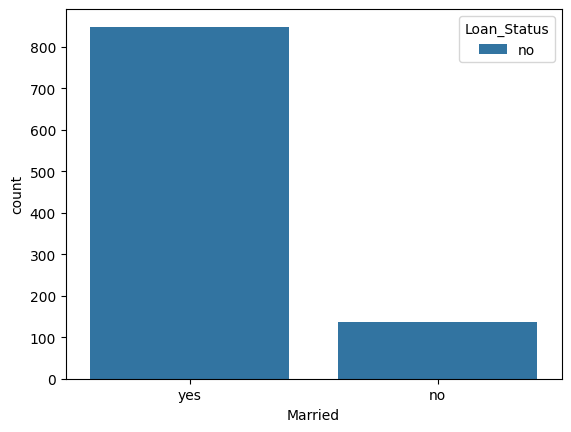

In [137]:
# creating a dataset with the interpretation of the 1s and 0s to give meaning
married_Loan = train[['Married', 'Loan_Status']]
married_mapping = {1: 'yes', 0: 'no'} # making the assumption that 0 is female and 1 is male
loan_stat_maps = {1: 'yes', 0: 'no'}

def replace_married(x):
    return married_mapping[x]

def replace_loanstatus(x):
    return loan_stat_maps[x]

married_Loan['Married'] = married_Loan['Married'].apply(replace_married)
married_Loan['Loan_Status'] = married_Loan['Loan_Status'].apply(replace_loanstatus)

sns.countplot(data=married_Loan, x='Married', hue='Loan_Status');


In [40]:
loan_status_by_marriage = married_Loan.groupby(['Married', 'Loan_Status'])[['Loan_Status']].count()
loan_status_by_marriage.rename(columns={'Loan_Status': 'Count'}, inplace=True)
loan_status_by_marriage.reset_index(inplace=True)
loan_status_by_marriage.head()

,Married,Loan_Status,Count
0,no,no,137
1,no,yes,721
2,yes,no,848
3,yes,yes,4192


In [41]:
a = float(loan_status_by_marriage['Count'][0]/(loan_status_by_marriage['Count'][1]))
b = float(loan_status_by_marriage['Count'][2]/(loan_status_by_marriage['Count'][3]))
print(f'The ratio of no to yes in males is: {a}')
print(f'The ratio of no to yes in females is: {b}')

The ratio of no to yes in males is: 0.1900138696255201
The ratio of no to yes in females is: 0.20229007633587787


Observation:

1. There is an approximate amount for rejection to approval regardless of marriage status (~0.2)
2. From the image it is not clear to see if being married or not married has any impact on a loans outcome.


Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. Apply a log transformation to the `Total_Income` feature to create additional features
9. split the train data into a train-val-test set.
10. Perform resampling of the minority class after the split using SMOTE
11. Might need to drop the gender column as it seems to have no effect on if a loan is rejected or approved.
12. Might need to drop the Married column as it seems to have no effect on if a loan is rejected or approved.

##### Investigating 'Dependents' vs 'Loan_Status'


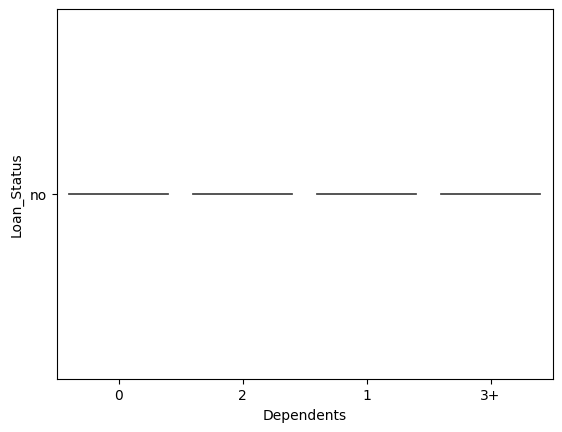

In [138]:
# creating a dataset with the interpretation of the 1s and 0s to give meaning
dependents_load = train[['Dependents', 'Loan_Status']]
# dependents_load = {1: 'yes', 0: 'no'} # making the assumption that 0 is female and 1 is male
loan_stat_maps = {1: 'yes', 0: 'no'}

def replace_married(x):
    return married_mapping[x]

def replace_loanstatus(x):
    return loan_stat_maps[x]

# dependents_load['Married'] = dependents_load['Married'].apply(replace_married)
dependents_load['Loan_Status'] = dependents_load['Loan_Status'].apply(replace_loanstatus)

sns.violinplot(data=dependents_load, x='Dependents', y='Loan_Status');

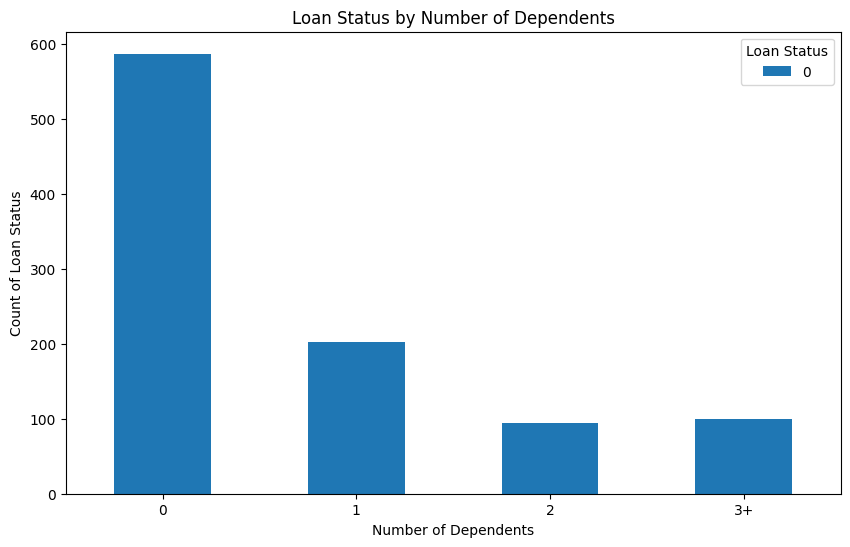

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
# train = pd.DataFrame({'loan_status': [...], 'dependents': [...]})

# Step 1: Count the occurrences of each loan status per level of dependents
count_data = train.groupby(['Dependents', 'Loan_Status']).size().unstack(fill_value=0)

# Step 2: Plotting grouped bar chart
count_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Step 3: Customize the plot
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count of Loan Status')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)  # Rotate x-axis labels for clarity if needed

# Display the plot
plt.show()


In [140]:
count_data['ratio_no_to_yes'] = count_data[0]/count_data[1]
count_data

KeyError: 1

In [141]:
# Grouping by 'Dependents' and counting 'Loan_Status' values
dependent_counts = train.groupby(['Dependents', 'Loan_Status'])['Loan_Status'].value_counts().unstack().fillna(0)

# Renaming the columns for clarity (optional)
dependent_counts.columns = ['Total_Status_No', 'Total_Status_Yes']

# Display the result
dependent_counts.reset_index(inplace=True)

# create the ratio
dependent_counts['ratio_of_no_to_yes'] = dependent_counts['Total_Status_No']/dependent_counts['Total_Status_Yes']*100

# view the results
sns.barplot(data=dependent_counts, x='Dependents', y='ratio_of_no_to_yes');

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

Observation:

1. Applicants with no dependents makeup the majority of loan applicants while applicants with 2 dependents form the least
2. There is a gradual rise in loan application rejections as the number of dependents an applicant has increases.

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. Apply a log transformation to the `Total_Income` feature to create additional features
9. split the train data into a train-val-test set.
10. Perform resampling of the minority class after the split using SMOTE
11. Might need to drop the gender column as it seems to have no effect on if a loan is rejected or approved.
12. Might need to drop the Married column as it seems to have no effect on if a loan is rejected or approved.
13. Number of dependents is a an important column and should prove valueable to the models

##### Investigating 'Education' vs 'Loan_Status'

Knowledge brought forward tells us education is a binary column stating if a person is a graduate or undergraduate. 

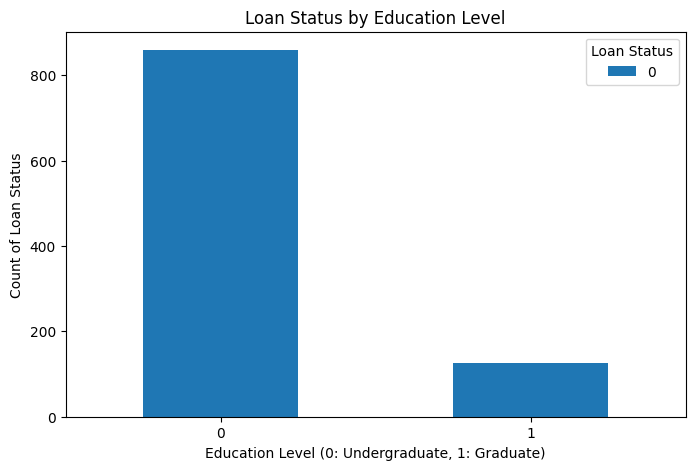

In [142]:
# Grouping by Education and Loan Status to get counts
education_loan_status = train.groupby(['Education', 'Loan_Status']).size().unstack(fill_value=0)

# Plotting grouped bar chart
education_loan_status.plot(kind='bar', stacked=True, figsize=(8, 5))

# Customizing the plot
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level (0: Undergraduate, 1: Graduate)')
plt.ylabel('Count of Loan Status')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Display the plot
plt.show()


In [143]:
education_loan_status['ratio_no_to_yes'] = education_loan_status[0]/education_loan_status[1]
education_loan_status

KeyError: 1

Observation

1. More undergraduate loans are approved in relation to graduate loans and there are more undergraduate applicants 

Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. Apply a log transformation to the `Total_Income` feature to create additional features
9. split the train data into a train-val-test set.
10. Perform resampling of the minority class after the split using SMOTE
11. Might need to drop the gender column as it seems to have no effect on if a loan is rejected or approved.
12. Might need to drop the Married column as it seems to have no effect on if a loan is rejected or approved.
13. Number of dependents is a an important column and should prove valueable to the models
14. Education status seems to also be important as there seems to be more undergraduate loans being approved

##### Investigating 'Self_Employed' vs 'Loan_Status'



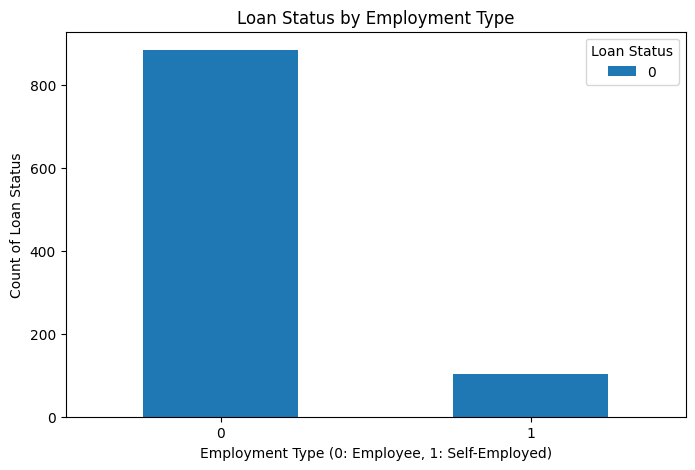

In [144]:
# Grouping by Education and Loan Status to get counts
employee_type_loan_status = train.groupby(['Self_Employed', 'Loan_Status']).size().unstack(fill_value=0)

# Plotting grouped bar chart
employee_type_loan_status.plot(kind='bar', stacked=True, figsize=(8, 5))

# Customizing the plot
plt.title('Loan Status by Employment Type')
plt.xlabel('Employment Type (0: Employee, 1: Self-Employed)')
plt.ylabel('Count of Loan Status')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Display the plot
plt.show()


In [145]:
employee_type_loan_status['ratio_no_to_yes'] = employee_type_loan_status[0]/employee_type_loan_status[1]
employee_type_loan_status

KeyError: 1

Observation

1. self-employed applicants are more likely to be approved than employees although they are much less applicants


Action ToDos based on observation.

1. Drop the Loan_ID column.
2. replace the 3+ with 3 in the `Dependents`.
3. Convert the `Dependents` feature into a numeric datatype.
4. Apply a log transformation to the `ApplicantIncome` feature to create additional features
5. Apply a log transformation to the `CoapplicantIncome` feature to create additional features
6. Apply a log transformation to the `LoanAmount` feature to create additional features
7. Apply a box cox transformation to the `Loan_Amount_Term` feature to create additional features
8. Apply a log transformation to the `Total_Income` feature to create additional features
9. create a X and y(Loan_Status) set and split the train data into a train-val-test set.
10. Perform resampling of the minority class after the split using SMOTE
11. Might need to drop the gender column as it seems to have no effect on if a loan is rejected or approved.
12. Might need to drop the Married column as it seems to have no effect on if a loan is rejected or approved.
13. Number of dependents is a an important column and should prove valueable to the models
14. Education status seems to also be important as there seems to be more undergraduate loans being approved
15. keep Self_Employed

##### Investigating 'Applicantincome' vs 'Loan_Status'

In [146]:
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ai_log,ai_bc,cai_log,cai_bc,la_log,la_bc,lat_log,lat_bc,ti_log,ti_bc
1,79428,LP001448,1,1,0,0,0,150,3858.458782,188,370,1,1,0,6000,5.010635,11.148899,8.258023,8.098014,5.236442,2.788539,5.913503,5.426780e+07,5.010635,11.148899
2,70497,LP002231,0,0,0,0,0,4989,315.472511,17,348,1,0,0,6000,8.514991,36.369023,5.754072,5.676078,2.833213,1.973950,5.852202,4.457749e+07,8.514991,36.369023
28,55554,LP002187,1,0,2,0,0,13464,1.000000,146,367,0,1,0,6000,9.507775,49.444762,0.000000,0.000000,4.983607,2.725724,5.905362,5.286850e+07,9.507775,49.444762
43,51055,LP002585,1,1,1,0,0,5214,1.000000,40,361,1,0,0,6000,8.559103,36.874682,0.000000,0.000000,3.688879,2.326553,5.888878,5.014475e+07,8.559103,36.874682
50,82924,LP002368,1,1,0,0,0,8279,1.000000,50,372,1,1,0,3750,9.021477,42.576755,0.000000,0.000000,3.912023,2.405767,5.918894,5.521471e+07,9.021477,42.576755


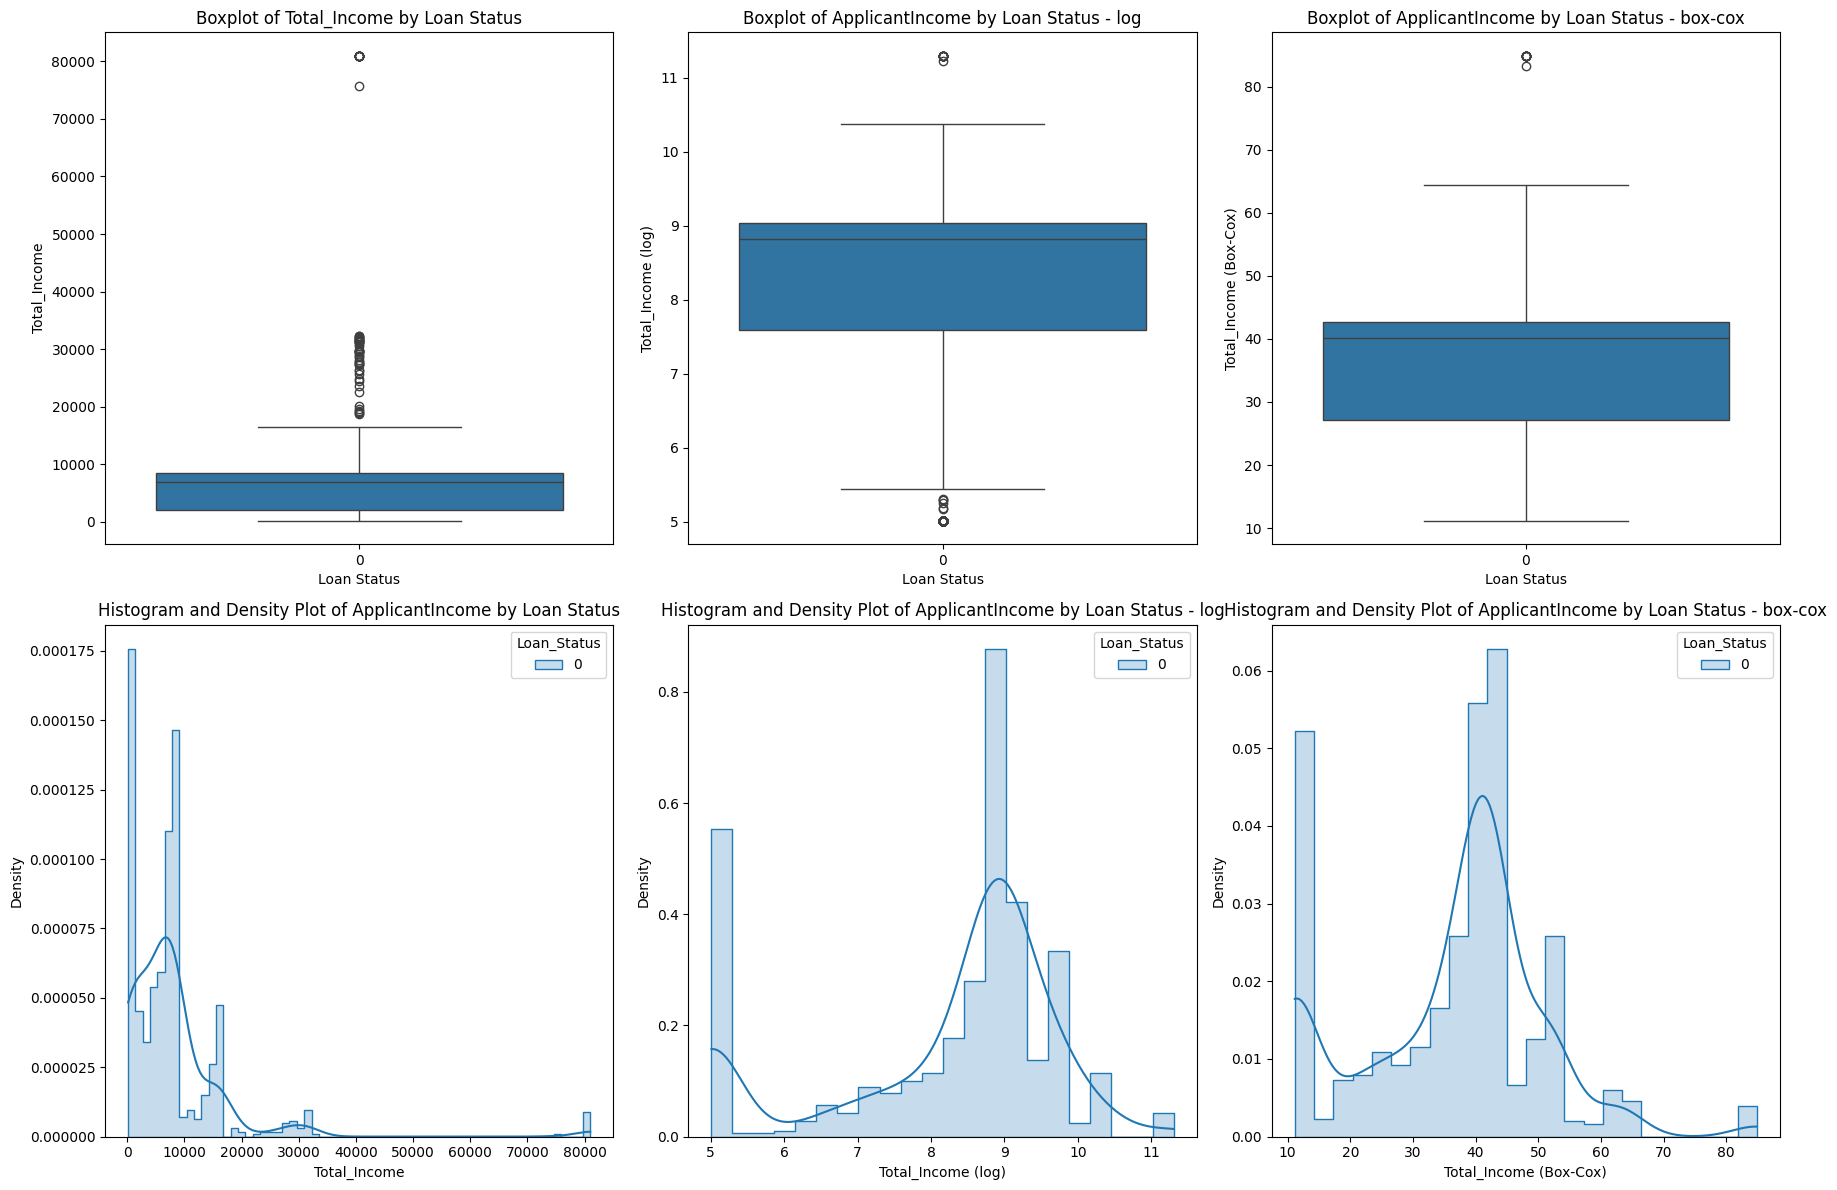

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplot of Loan_Amount_Term by Loan_Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Total_Income by Loan Status')
axes[0, 0].set_xlabel('Loan Status')
axes[0, 0].set_ylabel('Total_Income')

# Boxplot of Loan_Amount_Term by Loan_Status - log
sns.boxplot(x='Loan_Status', y='ai_log', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of ApplicantIncome by Loan Status - log')
axes[0, 1].set_xlabel('Loan Status')
axes[0, 1].set_ylabel('Total_Income (log)')

# Boxplot of Loan_Amount_Term by Loan_Status - box-cox
sns.boxplot(x='Loan_Status', y='ai_bc', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of ApplicantIncome by Loan Status - box-cox')
axes[0, 2].set_xlabel('Loan Status')
axes[0, 2].set_ylabel('Total_Income (Box-Cox)')

# Histogram and density plot for Loan_Amount_Term by Loan_Status
sns.histplot(data=train, x='ApplicantIncome', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 0])
axes[1, 0].set_title('Histogram and Density Plot of ApplicantIncome by Loan Status')
axes[1, 0].set_xlabel('Total_Income')
axes[1, 0].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - log
sns.histplot(data=train, x='ai_log', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 1])
axes[1, 1].set_title('Histogram and Density Plot of ApplicantIncome by Loan Status - log')
axes[1, 1].set_xlabel('Total_Income (log)')
axes[1, 1].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - box-cox
sns.histplot(data=train, x='ai_bc', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 2])
axes[1, 2].set_title('Histogram and Density Plot of ApplicantIncome by Loan Status - box-cox')
axes[1, 2].set_xlabel('Total_Income (Box-Cox)')
axes[1, 2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

##### Investigating 'Applicantincome' vs 'Loan_Status'

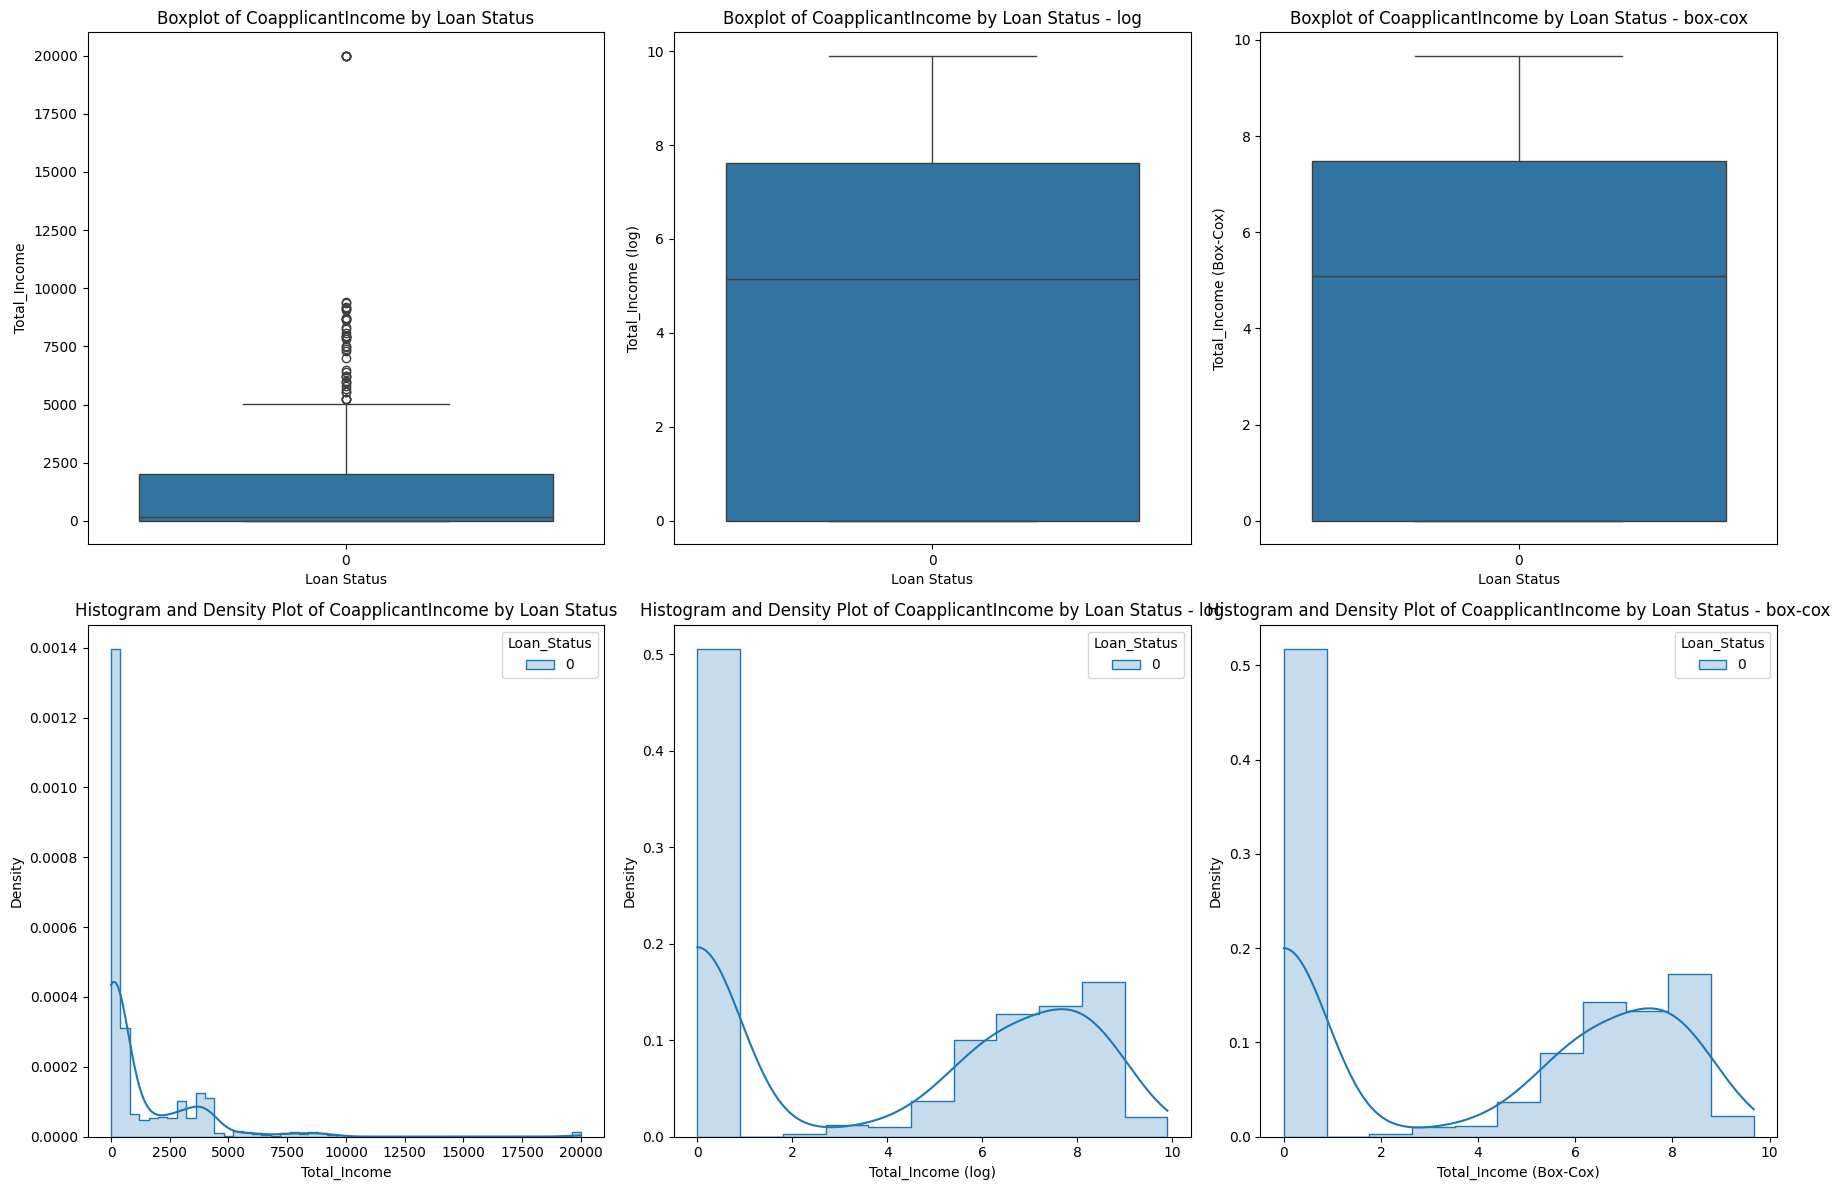

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplot of Loan_Amount_Term by Loan_Status
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of CoapplicantIncome by Loan Status')
axes[0, 0].set_xlabel('Loan Status')
axes[0, 0].set_ylabel('Total_Income')

# Boxplot of Loan_Amount_Term by Loan_Status - log
sns.boxplot(x='Loan_Status', y='cai_log', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of CoapplicantIncome by Loan Status - log')
axes[0, 1].set_xlabel('Loan Status')
axes[0, 1].set_ylabel('Total_Income (log)')

# Boxplot of Loan_Amount_Term by Loan_Status - box-cox
sns.boxplot(x='Loan_Status', y='cai_bc', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of CoapplicantIncome by Loan Status - box-cox')
axes[0, 2].set_xlabel('Loan Status')
axes[0, 2].set_ylabel('Total_Income (Box-Cox)')

# Histogram and density plot for Loan_Amount_Term by Loan_Status
sns.histplot(data=train, x='CoapplicantIncome', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 0])
axes[1, 0].set_title('Histogram and Density Plot of CoapplicantIncome by Loan Status')
axes[1, 0].set_xlabel('Total_Income')
axes[1, 0].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - log
sns.histplot(data=train, x='cai_log', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 1])
axes[1, 1].set_title('Histogram and Density Plot of CoapplicantIncome by Loan Status - log')
axes[1, 1].set_xlabel('Total_Income (log)')
axes[1, 1].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - box-cox
sns.histplot(data=train, x='cai_bc', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 2])
axes[1, 2].set_title('Histogram and Density Plot of CoapplicantIncome by Loan Status - box-cox')
axes[1, 2].set_xlabel('Total_Income (Box-Cox)')
axes[1, 2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

Observationt:

1. Log transformation of CoapplicantIncome is beneficial as it reduces skewness and outliers.
2. The overlap between approved and not approved distributions suggests that coapplicant income alone might not be a strong predictor of loan status. However, it might still add value when combined with other features (e.g., applicant income, total income, credit history).


Recommendations for Model
1. Use the log-transformed CoapplicantIncome (cai_log) rather than the raw version to help the model interpret the data better.
2. To consider combining CoapplicantIncome with other features, such as ApplicantIncome or Credit_History, to create interaction terms that might capture more complex relationships.


##### Investigating 'LoanAmount' vs 'Loan_Status'

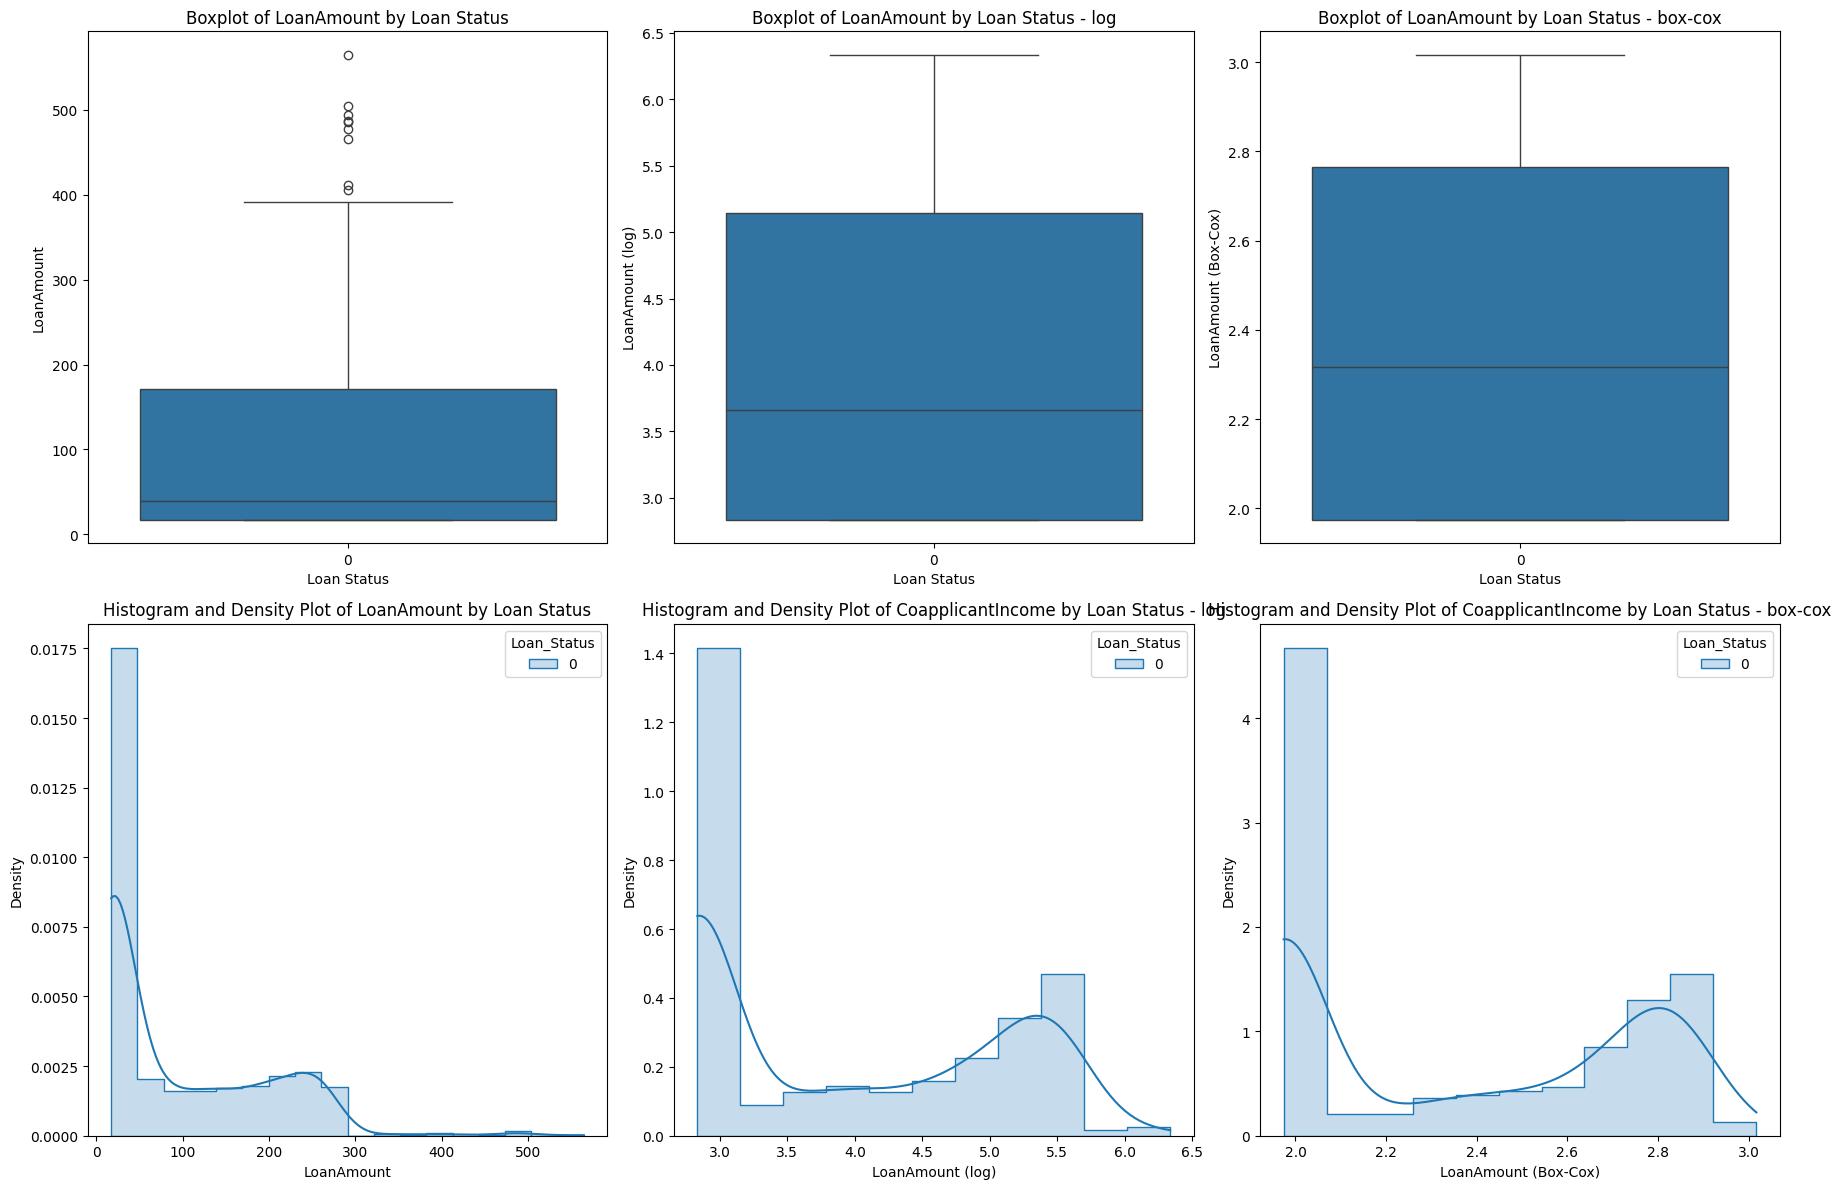

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplot of Loan_Amount_Term by Loan_Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of LoanAmount by Loan Status')
axes[0, 0].set_xlabel('Loan Status')
axes[0, 0].set_ylabel('LoanAmount')

# Boxplot of Loan_Amount_Term by Loan_Status - log
sns.boxplot(x='Loan_Status', y='la_log', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of LoanAmount by Loan Status - log')
axes[0, 1].set_xlabel('Loan Status')
axes[0, 1].set_ylabel('LoanAmount (log)')

# Boxplot of Loan_Amount_Term by Loan_Status - box-cox
sns.boxplot(x='Loan_Status', y='la_bc', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of LoanAmount by Loan Status - box-cox')
axes[0, 2].set_xlabel('Loan Status')
axes[0, 2].set_ylabel('LoanAmount (Box-Cox)')

# Histogram and density plot for Loan_Amount_Term by Loan_Status
sns.histplot(data=train, x='LoanAmount', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 0])
axes[1, 0].set_title('Histogram and Density Plot of LoanAmount by Loan Status')
axes[1, 0].set_xlabel('LoanAmount')
axes[1, 0].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - log
sns.histplot(data=train, x='la_log', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 1])
axes[1, 1].set_title('Histogram and Density Plot of CoapplicantIncome by Loan Status - log')
axes[1, 1].set_xlabel('LoanAmount (log)')
axes[1, 1].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - box-cox
sns.histplot(data=train, x='la_bc', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 2])
axes[1, 2].set_title('Histogram and Density Plot of CoapplicantIncome by Loan Status - box-cox')
axes[1, 2].set_xlabel('LoanAmount (Box-Cox)')
axes[1, 2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

Observation:

1. Log transformation of LoanAmount is beneficial for reducing skewness and outliers, making the feature more interpretable for the model.
2. While there is overlap between loan statuses, the log-transformed LoanAmount might offer slight separation, especially for moderate loan amounts, which could be valuable in the model.

Recommendations for Model
1. Use the log-transformed LoanAmount (la_log) as it reduces the impact of outliers and normalizes the distribution.
2. Consider combining LoanAmount with income-related features, such as Total_Income or Loan_Amount_Term, to capture relative loan burdens or monthly payment indicators.

In [150]:
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ai_log,ai_bc,cai_log,cai_bc,la_log,la_bc,lat_log,lat_bc,ti_log,ti_bc
1,79428,LP001448,1,1,0,0,0,150,3858.458782,188,370,1,1,0,6000,5.010635,11.148899,8.258023,8.098014,5.236442,2.788539,5.913503,5.426780e+07,5.010635,11.148899
2,70497,LP002231,0,0,0,0,0,4989,315.472511,17,348,1,0,0,6000,8.514991,36.369023,5.754072,5.676078,2.833213,1.973950,5.852202,4.457749e+07,8.514991,36.369023
28,55554,LP002187,1,0,2,0,0,13464,1.000000,146,367,0,1,0,6000,9.507775,49.444762,0.000000,0.000000,4.983607,2.725724,5.905362,5.286850e+07,9.507775,49.444762
43,51055,LP002585,1,1,1,0,0,5214,1.000000,40,361,1,0,0,6000,8.559103,36.874682,0.000000,0.000000,3.688879,2.326553,5.888878,5.014475e+07,8.559103,36.874682
50,82924,LP002368,1,1,0,0,0,8279,1.000000,50,372,1,1,0,3750,9.021477,42.576755,0.000000,0.000000,3.912023,2.405767,5.918894,5.521471e+07,9.021477,42.576755


##### Investigating 'Loan_Amount_Term' vs 'Loan_Status'

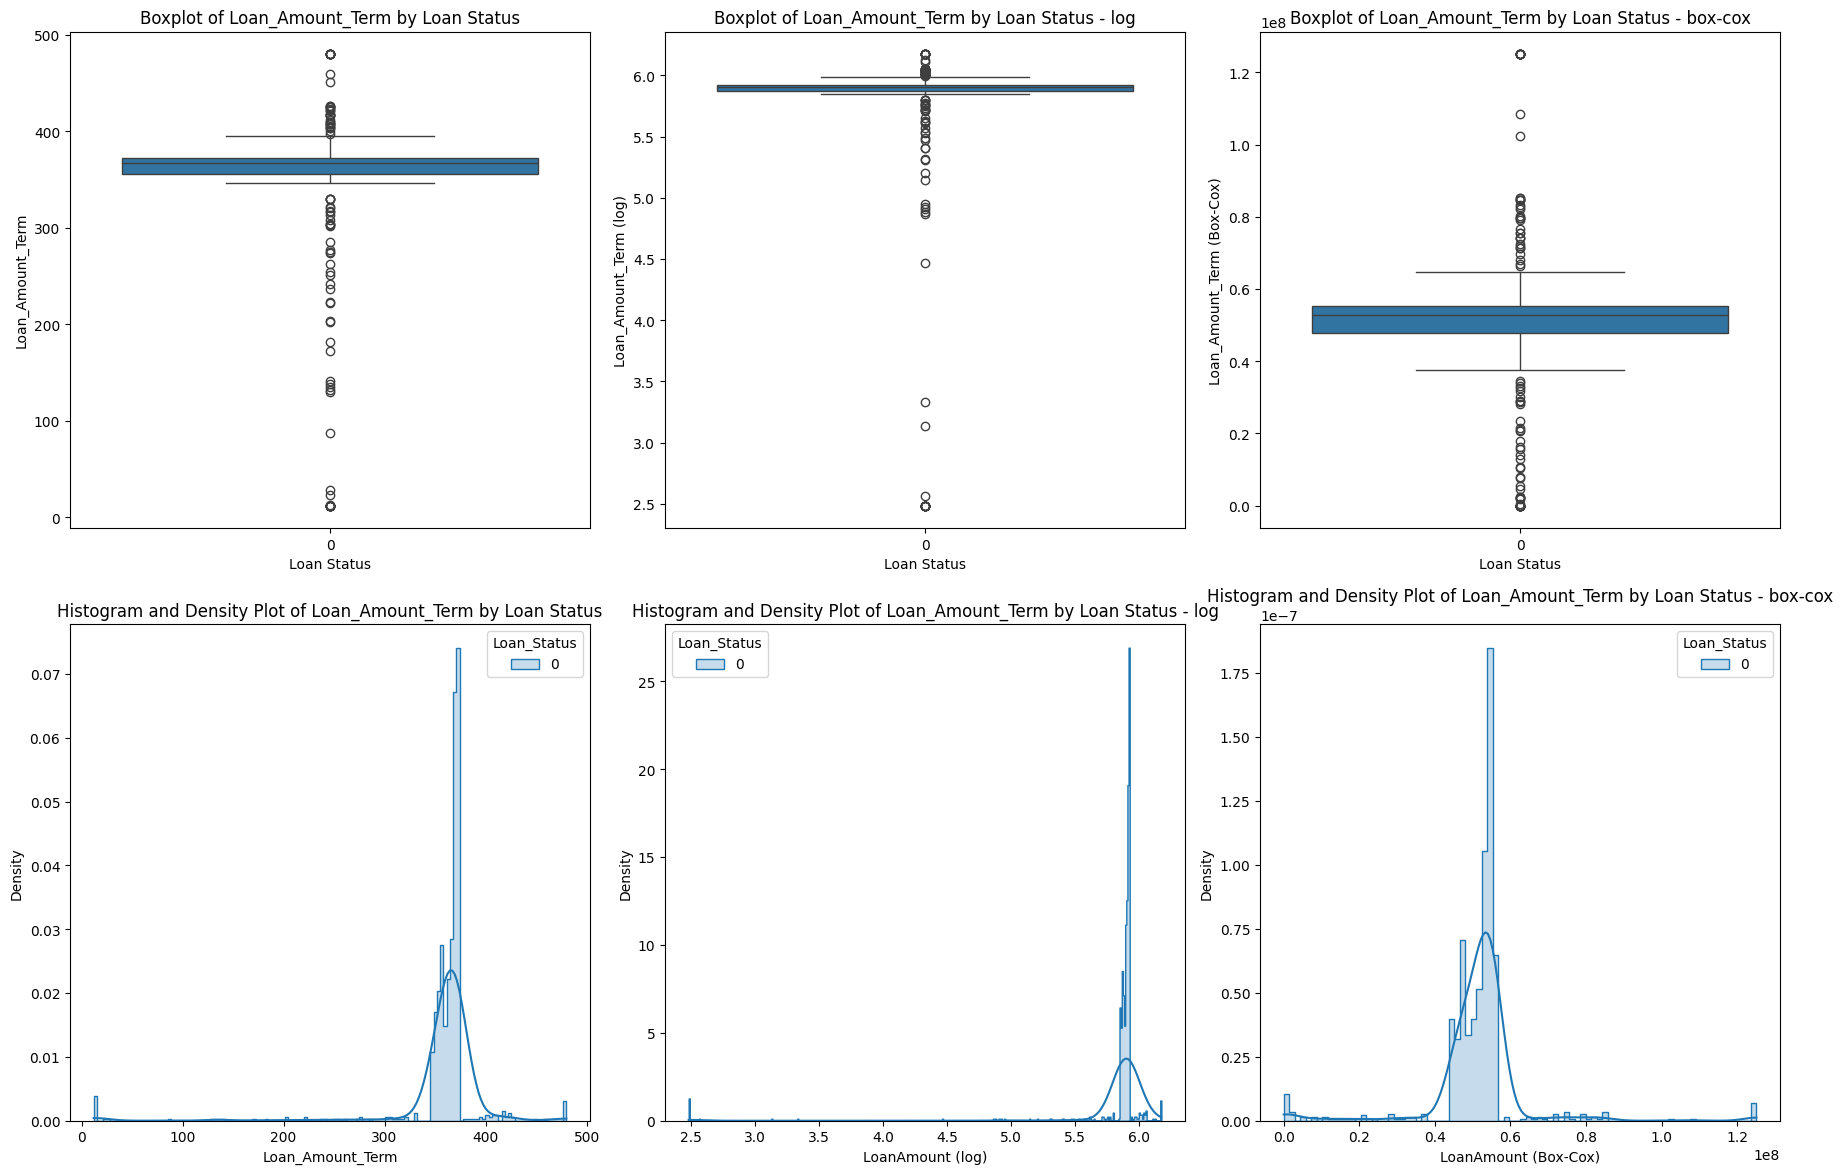

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplot of Loan_Amount_Term by Loan_Status
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Loan_Amount_Term by Loan Status')
axes[0, 0].set_xlabel('Loan Status')
axes[0, 0].set_ylabel('Loan_Amount_Term')

# Boxplot of Loan_Amount_Term by Loan_Status - log
sns.boxplot(x='Loan_Status', y='lat_log', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Loan_Amount_Term by Loan Status - log')
axes[0, 1].set_xlabel('Loan Status')
axes[0, 1].set_ylabel('Loan_Amount_Term (log)')

# Boxplot of Loan_Amount_Term by Loan_Status - box-cox
sns.boxplot(x='Loan_Status', y='lat_bc', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of Loan_Amount_Term by Loan Status - box-cox')
axes[0, 2].set_xlabel('Loan Status')
axes[0, 2].set_ylabel('Loan_Amount_Term (Box-Cox)')

# Histogram and density plot for Loan_Amount_Term by Loan_Status
sns.histplot(data=train, x='Loan_Amount_Term', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 0])
axes[1, 0].set_title('Histogram and Density Plot of Loan_Amount_Term by Loan Status')
axes[1, 0].set_xlabel('Loan_Amount_Term')
axes[1, 0].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - log
sns.histplot(data=train, x='lat_log', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 1])
axes[1, 1].set_title('Histogram and Density Plot of Loan_Amount_Term by Loan Status - log')
axes[1, 1].set_xlabel('LoanAmount (log)')
axes[1, 1].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - box-cox
sns.histplot(data=train, x='lat_bc', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 2])
axes[1, 2].set_title('Histogram and Density Plot of Loan_Amount_Term by Loan Status - box-cox')
axes[1, 2].set_xlabel('LoanAmount (Box-Cox)')
axes[1, 2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

##### Investigating 'Loan_Amount_Term' vs 'Loan_Status'

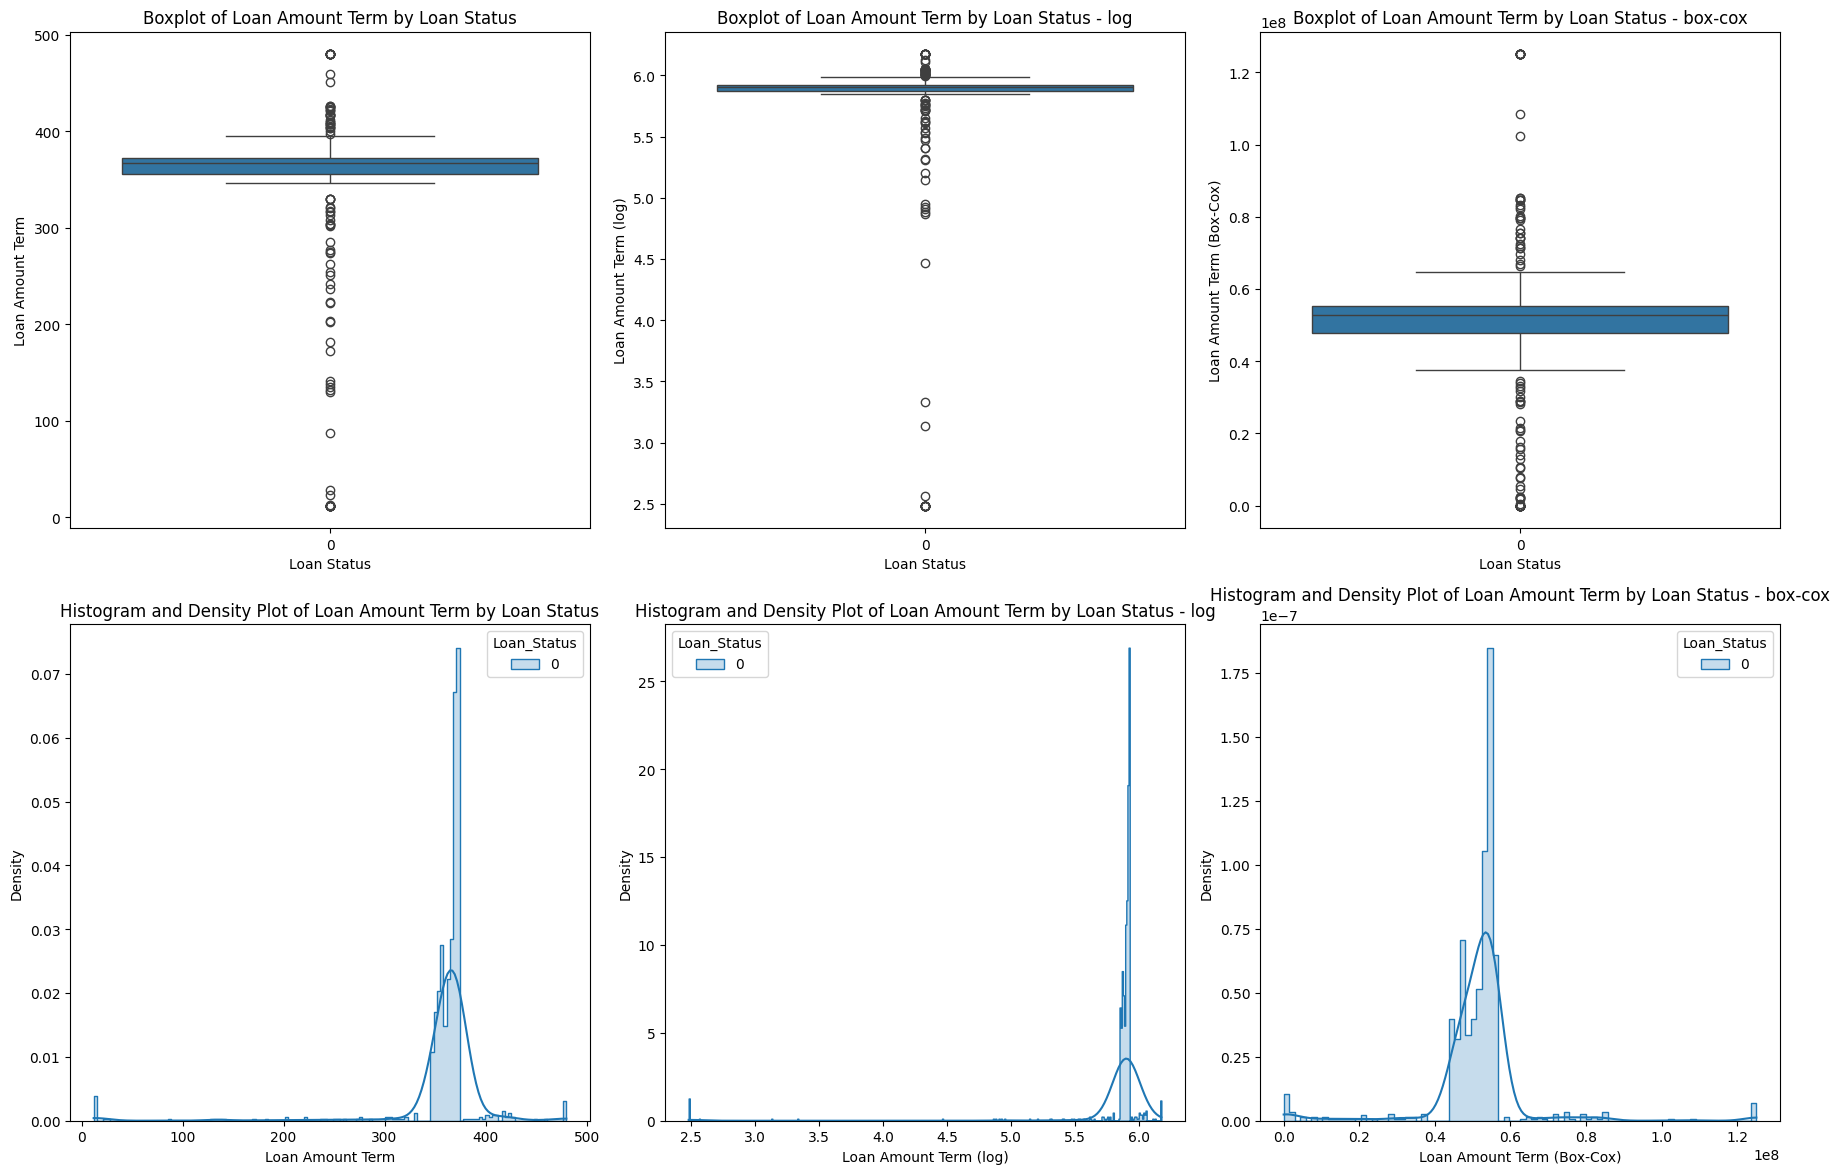

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplot of Loan_Amount_Term by Loan_Status
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Loan Amount Term by Loan Status')
axes[0, 0].set_xlabel('Loan Status')
axes[0, 0].set_ylabel('Loan Amount Term')

# Boxplot of Loan_Amount_Term by Loan_Status - log
sns.boxplot(x='Loan_Status', y='lat_log', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Loan Amount Term by Loan Status - log')
axes[0, 1].set_xlabel('Loan Status')
axes[0, 1].set_ylabel('Loan Amount Term (log)')

# Boxplot of Loan_Amount_Term by Loan_Status - box-cox
sns.boxplot(x='Loan_Status', y='lat_bc', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of Loan Amount Term by Loan Status - box-cox')
axes[0, 2].set_xlabel('Loan Status')
axes[0, 2].set_ylabel('Loan Amount Term (Box-Cox)')

# Histogram and density plot for Loan_Amount_Term by Loan_Status
sns.histplot(data=train, x='Loan_Amount_Term', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 0])
axes[1, 0].set_title('Histogram and Density Plot of Loan Amount Term by Loan Status')
axes[1, 0].set_xlabel('Loan Amount Term')
axes[1, 0].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - log
sns.histplot(data=train, x='lat_log', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 1])
axes[1, 1].set_title('Histogram and Density Plot of Loan Amount Term by Loan Status - log')
axes[1, 1].set_xlabel('Loan Amount Term (log)')
axes[1, 1].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - box-cox
sns.histplot(data=train, x='lat_bc', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 2])
axes[1, 2].set_title('Histogram and Density Plot of Loan Amount Term by Loan Status - box-cox')
axes[1, 2].set_xlabel('Loan Amount Term (Box-Cox)')
axes[1, 2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


Observation: The visualizations for Loan_Amount_Term by Loan_Status indicate that:

1. Log transformation of Loan_Amount_Term is somewhat useful for reducing skewness and making the data more interpretable. However, the distribution remains sharply peaked at specific term lengths, especially 360 and 120, indicating a concentration around standard loan terms.
2. The Box-Cox transformation results in a scale change but does not significantly alter the distribution’s shape, suggesting limited added value from this transformation alone.
3. Loan term alone may not be a strong predictor of loan status, as both categories show similar medians and ranges. However, combining it with other features could enhance predictive power.


Recommendations for the Model
1. Use Log-Transformed Loan_Amount_Term (lat_log): Including the log-transformed Loan_Amount_Term as a feature might help stabilize the variance, making it easier for some models (like linear models) to interpret.
The log transformation reduces the skewness while preserving important distinctions between standard loan terms.
Combine Loan Term with Other Features:

2. Loan Term and Loan Amount: Consider creating an interaction term or ratio, such as LoanAmount / Loan_Amount_Term. This feature could provide insight into the loan burden on a monthly basis, which might influence loan approval decisions.
3. Loan Term and Total Income: Create a ratio like Loan_Amount_Term / Total_Income to capture the relationship between the term length and the applicant’s financial capacity. This could help the model learn how term length interacts with income levels in influencing approval.
4. Loan Term and Credit History: Combine Loan_Amount_Term with Credit_History to create an interaction term. This might capture how the loan term, coupled with credit history, affects approval likelihood, as longer terms might be associated with lower risk for applicants with strong credit.
5. Standardize Loan_Amount_Term Features for Models Sensitive to Scale:
6. Explore Binning of Loan Term: Given the strong peaks around specific values (e.g., 360, 120), you might consider binning Loan_Amount_Term into categorical ranges (e.g., “short-term,” “medium-term,” “long-term”) instead of using the continuous variable directly. This might simplify patterns that the model could learn more effectively.




In [153]:
from sklearn.preprocessing import LabelEncoder

# Define bins and labels
bins = [0, 180, 300, float('inf')]
labels = ['Short-Term', 'Medium-Term', 'Long-Term']

# Create the Loan_Term_Category column
train['Loan_Term_Category'] = pd.cut(train['Loan_Amount_Term'], bins=bins, labels=labels)

# Check if the column was created successfully
print(train[['Loan_Amount_Term', 'Loan_Term_Category']].head())
le = LabelEncoder()

# Check if 'Loan_Term_Category' exists before encoding
if 'Loan_Term_Category' in train.columns:
    train['Loan_Term_Category_Encoded'] = le.fit_transform(train['Loan_Term_Category'])
    print("Label encoding applied successfully.")
else:
    print("Error: 'Loan_Term_Category' column not found")

# Display the encoded column to verify
# train[['Loan_Amount_Term', 'Loan_Term_Category', 'Loan_Term_Category_Encoded']].groupby('')


    Loan_Amount_Term Loan_Term_Category
1                370          Long-Term
2                348          Long-Term
28               367          Long-Term
43               361          Long-Term
50               372          Long-Term
Label encoding applied successfully.


##### Investigating 'Credit_History' vs 'Loan_Status'

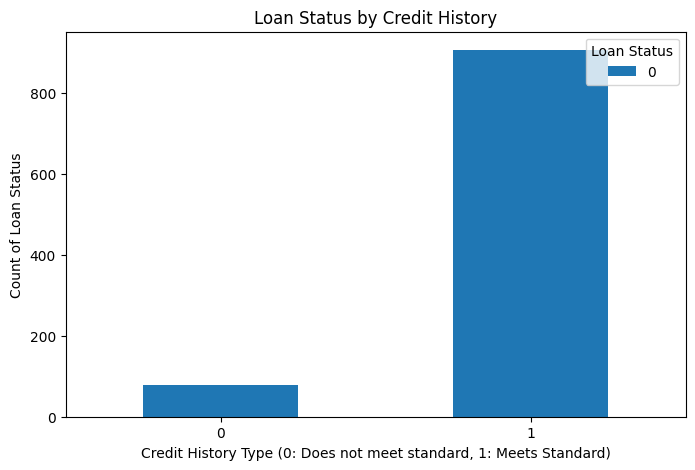

In [154]:
# Grouping by Education and Loan Status to get counts
employee_type_loan_status = train.groupby(['Credit_History', 'Loan_Status']).size().unstack(fill_value=0)

# Plotting grouped bar chart
employee_type_loan_status.plot(kind='bar', stacked=True, figsize=(8, 5))

# Customizing the plot
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History Type (0: Does not meet standard, 1: Meets Standard)')
plt.ylabel('Count of Loan Status')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Display the plot
plt.show()

In [155]:
# Grouping by Education and Loan Status to get counts
credit_loan_status = train.groupby(['Credit_History', 'Loan_Status']).size().unstack(fill_value=0)
credit_loan_status['ratio_no_to_yes'] = credit_loan_status[0]/credit_loan_status[1]
credit_loan_status

KeyError: 1

Observation

1. Credit history doesn't drastically change the likelihood of approval: Whether applicants have a good credit history (Credit_History = 1) or a poor one (Credit_History = 0), about 80% are still approved, and 20% are denied. This suggests that other factors are likely influencing the approval process, and credit history alone may not be the most powerful predictor of loan status.

2. Similar Denial Rates: The denial rate (20%) is nearly identical for both credit history categories, indicating that the credit history feature is not alone sufficient to determine loan approval. Other features, such as Income, Loan Amount, or Employment Status, might be contributing more to the decision.

Conclusion:
Credit History still plays an important role but does not fully explain loan approval outcomes.
It is likely that other features (such as income, loan amount, employment status, etc.) are also important and might interact with Credit_History to influence approval decisions.


Recommendations for the Model:

1. Combine Credit_History with Other Features:

    * Explore interactions between Credit_History and other features like Income, Loan_Amount, or Loan_Term to uncover any combined effects that might explain loan approval better.
    * Example interaction features:
        1. Credit_History * Total_Income
        2. Credit_History * Loan_Amount
        3. Credit_History * Employment_Status


2. Consider Non-linear Models: Models like Random Forest and XGBoost can automatically capture complex interactions between features without assuming linearity. These models can be particularly useful in handling multiple factors that contribute to the loan decision.

3. Address Class Imbalance: Although the data shows that 80% of loans are approved, the large imbalance between loan approvals and denials can still be a challenge for some models. Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting to ensure the model doesn't become biased toward predicting approvals.

4. Feature Engineering: Create new features that combine existing ones to capture more complex relationships between credit history and other features. For example:
    * Loan amount to income ratio (could reveal if high loans relative to income affect approval chances)
    * Debt-to-income ratio if derivable.


##### Investigating 'Property_Area' vs 'Loan_Status'

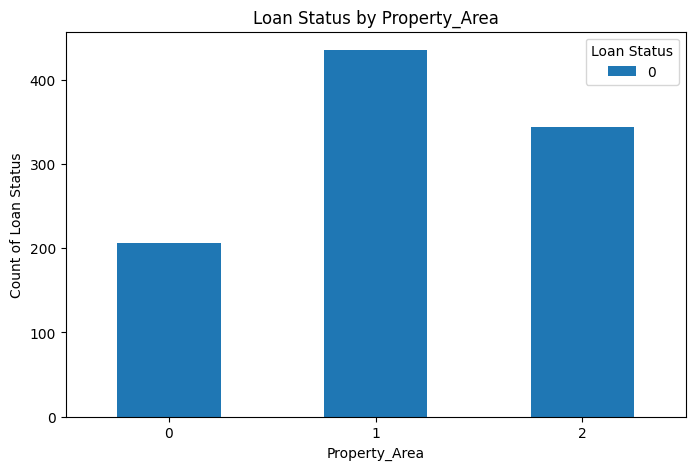

In [156]:
# Grouping by Education and Loan Status to get counts
employee_type_loan_status = train.groupby(['Property_Area', 'Loan_Status']).size().unstack(fill_value=0)

# Plotting grouped bar chart
employee_type_loan_status.plot(kind='bar', stacked=True, figsize=(8, 5))

# Customizing the plot
plt.title('Loan Status by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Count of Loan Status')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Display the plot
plt.show()

In [157]:
employee_type_loan_status['ratio_no_to_yes'] = employee_type_loan_status[0]/employee_type_loan_status[1]
employee_type_loan_status

KeyError: 1

Observation

1. Loan Approval Rates: Loan approval rates appear to be fairly consistent across the different property areas, but Property Area 2 has a slightly lower ratio of denials to approvals, indicating that loans in this area have a higher chance of being approved.
I2. mbalance Across Categories: There’s a noticeable difference in the absolute count of loans, particularly in Property Area 1, which has the highest number of applicants. However, the relative approval rates (ratios) are relatively consistent across all property areas, suggesting that the location does not drastically influence loan approval compared to other factors.


Recommendations for the Model:
1. Property Area Encoding: One-Hot Encoding: Since Property_Area has three categories (Urban, Semi-Urban, Rural), one-hot encoding would be an appropriate approach to represent this feature.
python

`train = pd.get_dummies(train, columns=['Property_Area'], drop_first=True)`

2. Interaction Features: 
    * Property Area and Loan Amount: Create interaction terms between Property_Area and other features like LoanAmount or ApplicantIncome. For example, in rural areas (Property Area 2), higher loan amounts might be less common, which could be an important feature.
    * Property Area and Income: Interaction terms like Property_Area * Total_Income might also capture how property area affects loan approval relative to income.

3. Class Imbalance: Since the number of approvals and denials is imbalanced in all property areas, consider using techniques like class weighting or SMOTE to ensure that the model doesn’t become biased toward the majority class.

4. Cross-Feature Exploration: Explore interactions between Property Area, Credit History, and Loan Amount. For example, applicants in urban areas with a good credit history and higher loan amounts might have different approval chances compared to rural areas.









##### Investigating 'Total Income' vs 'Loan_Status'

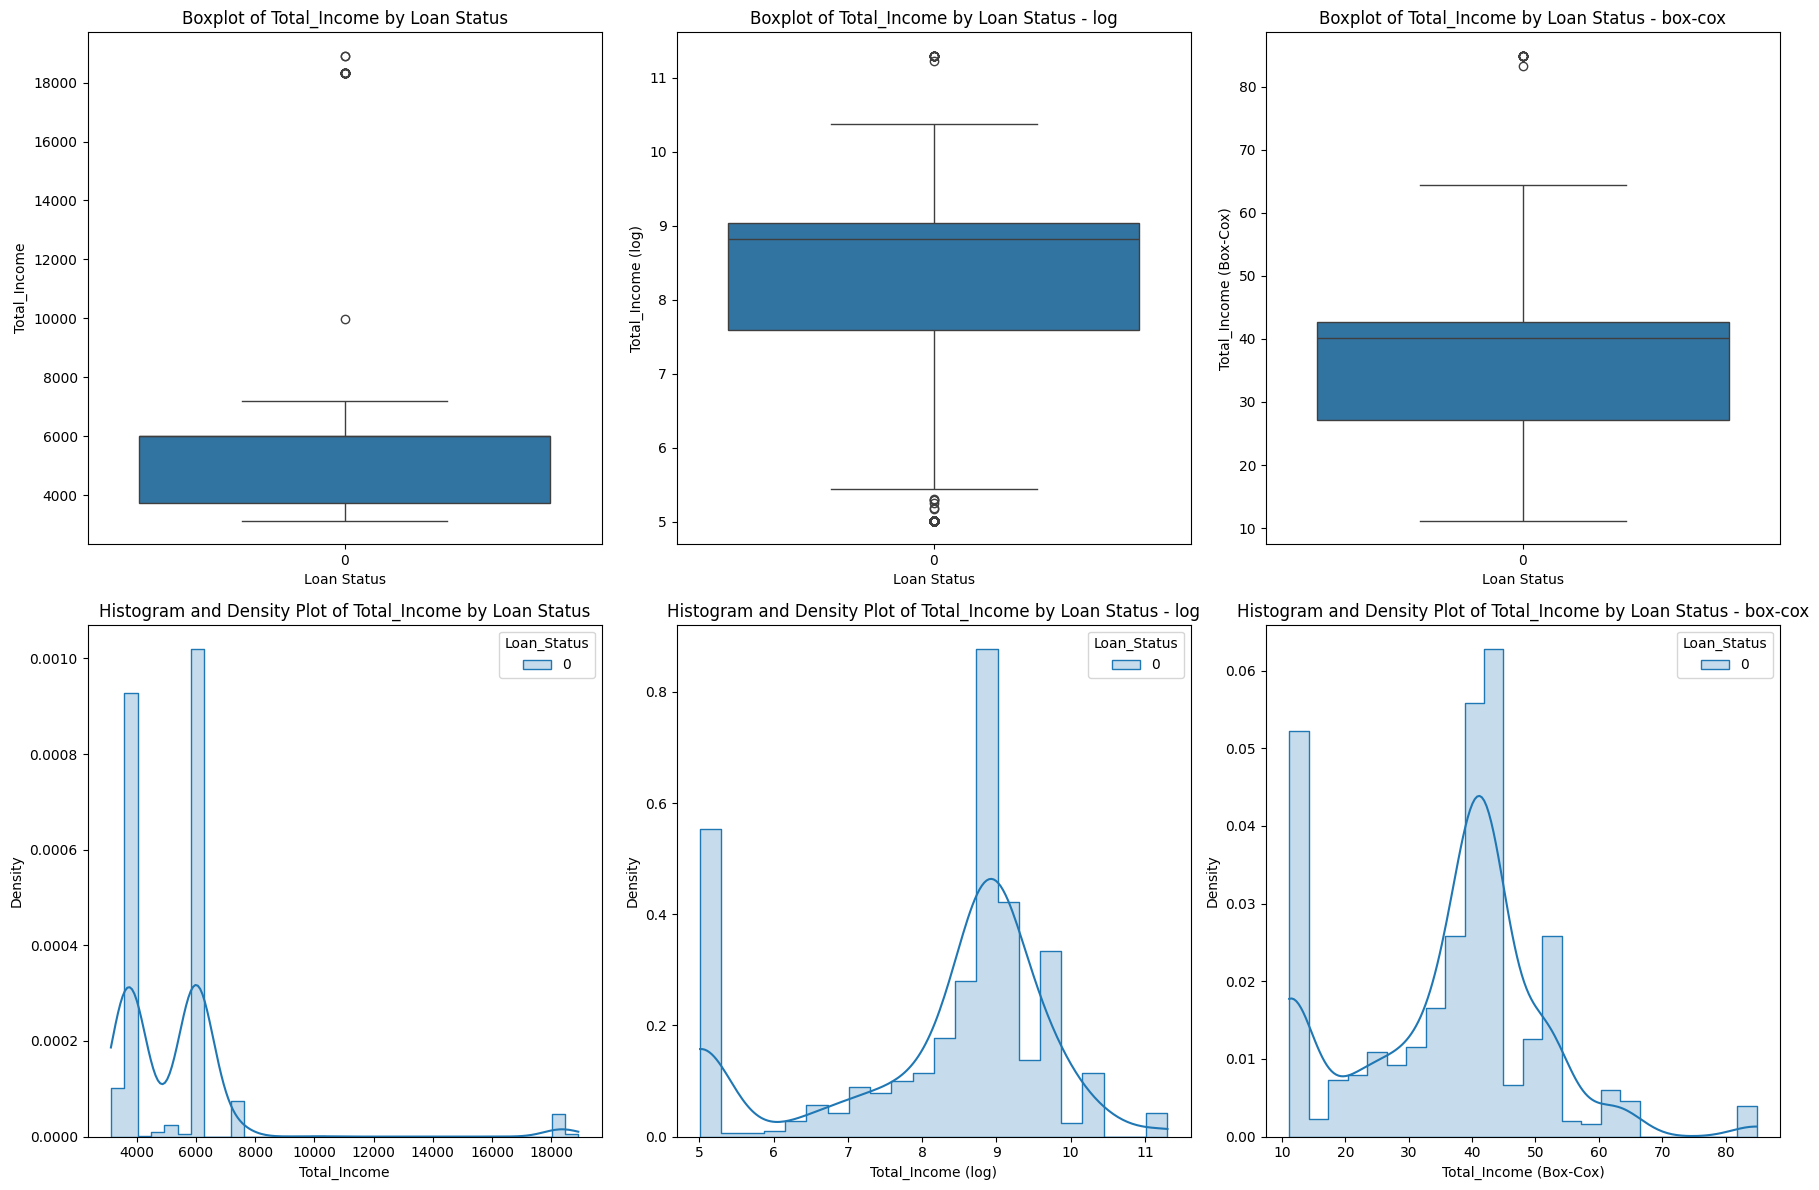

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplot of Loan_Amount_Term by Loan_Status
sns.boxplot(x='Loan_Status', y='Total_Income', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Total_Income by Loan Status')
axes[0, 0].set_xlabel('Loan Status')
axes[0, 0].set_ylabel('Total_Income')

# Boxplot of Loan_Amount_Term by Loan_Status - log
sns.boxplot(x='Loan_Status', y='ti_log', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Total_Income by Loan Status - log')
axes[0, 1].set_xlabel('Loan Status')
axes[0, 1].set_ylabel('Total_Income (log)')

# Boxplot of Loan_Amount_Term by Loan_Status - box-cox
sns.boxplot(x='Loan_Status', y='ti_bc', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of Total_Income by Loan Status - box-cox')
axes[0, 2].set_xlabel('Loan Status')
axes[0, 2].set_ylabel('Total_Income (Box-Cox)')

# Histogram and density plot for Loan_Amount_Term by Loan_Status
sns.histplot(data=train, x='Total_Income', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 0])
axes[1, 0].set_title('Histogram and Density Plot of Total_Income by Loan Status')
axes[1, 0].set_xlabel('Total_Income')
axes[1, 0].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - log
sns.histplot(data=train, x='ti_log', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 1])
axes[1, 1].set_title('Histogram and Density Plot of Total_Income by Loan Status - log')
axes[1, 1].set_xlabel('Total_Income (log)')
axes[1, 1].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - box-cox
sns.histplot(data=train, x='ti_bc', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 2])
axes[1, 2].set_title('Histogram and Density Plot of Total_Income by Loan Status - box-cox')
axes[1, 2].set_xlabel('Total_Income (Box-Cox)')
axes[1, 2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

**Observations**: 


  The visualizations you have uploaded represent the analysis of **Total_Income** by **Loan Status**, with the data shown in three different forms: raw, log-transformed, and Box-Cox transformed. Let's break down these plots:

  1. **Boxplots**:
  - **Raw Total Income** (left plot):
    - The boxplots show that there is a **significant spread in Total Income** for both approved (1) and denied (0) loans, with outliers in both categories.
    - The median Total Income appears fairly similar for both loan statuses, although there is a higher degree of spread (i.e., more variance) for those with loan approvals.
    
  - **Log-Transformed Total Income** (middle plot):
    - The log transformation reduces the spread of the data and minimizes the impact of extreme values (outliers).
    - The boxplots for both loan statuses are now more compact, and the distribution looks smoother. This transformation is helpful for improving the model's ability to detect relationships between income and loan approval.

  - **Box-Cox Transformed Total Income** (right plot):
    - The Box-Cox transformation also reduces the spread of the data, similar to the log transformation, but it has also handled the skewness by applying a more flexible transformation.
    - Outliers are further reduced, and both distributions are now more centered around their median values.

  2. **Histograms and Density Plots**:
  - **Raw Total Income** (bottom left plot):
    - The histogram is highly skewed, with most of the data points concentrated around low income values, and a few extreme high-income outliers.
    - The density plot shows that loan approvals (`Loan_Status` = 1) are more spread out across the range of incomes, with a peak near higher income values, while loan denials (`Loan_Status` = 0) are heavily concentrated near lower incomes.

  - **Log-Transformed Total Income** (bottom middle plot):
    - After the log transformation, the distribution is more balanced, and both loan approvals and denials are better spread across the range of values.
    - This transformation makes the data more suitable for analysis by reducing the impact of outliers and skewness.

  - **Box-Cox Transformed Total Income** (bottom right plot):
    - The Box-Cox transformation has smoothed the distribution further, making it more symmetric and easier for the model to interpret. The density for approved loans (`Loan_Status` = 1) shows a more even spread, and the loan denials are more evenly distributed across the range.

  **Modeling Implications**:
  1. **Log and Box-Cox Transformations Are Beneficial**:
    - Both **log** and **Box-Cox transformations** help make the data more **normally distributed** and reduce the impact of extreme outliers. These transformations are generally beneficial for models like **XGBoost**, **Random Forest**, and **Logistic Regression**, which may struggle with highly skewed data.

  2. **Feature Selection**:
    - Based on the transformed distributions, **log** or **Box-Cox transformed `Total_Income`** could be a better feature for modeling, as it provides a more stable distribution and reduces the effect of outliers.

  3. **Income as a Predictive Feature**:
    - **Total_Income** is likely to be an important feature for predicting loan approval. The histogram shows a clear distinction between loan approvals and denials in both raw and transformed forms.
    - **Log or Box-Cox transformed `Total_Income`** can be used as an input feature to the model, potentially improving the predictive performance by making the feature distribution more interpretable and stable.

  **Recommendations**:

  1. **Feature Engineering**:
    - Use the **log-transformed** or **Box-Cox transformed `Total_Income`** in your model, as these transformations help address skewness and outliers in the data.
    - Consider creating interaction features between `Total_Income` and other features (e.g., `LoanAmount`, `Credit_History`, etc.) to capture more complex relationships.
    
  2. **Class Imbalance Handling**:
    - Given that loan approval rates are generally imbalanced, consider applying **SMOTE** or using **class weights** in models like **XGBoost** or **Random Forest** to handle this imbalance effectively.

  3. **Modeling**:
    - Start by testing **XGBoost** or **Random Forest**, as these tree-based models can handle interactions between transformed income features well.
    - If using linear models like **Logistic Regression**, make sure to scale the features if you decide to use them without tree-based models.

## Feature Engineering

In [159]:
train['all_income'] = train['ApplicantIncome'] + train['CoapplicantIncome'] + train['Total_Income']

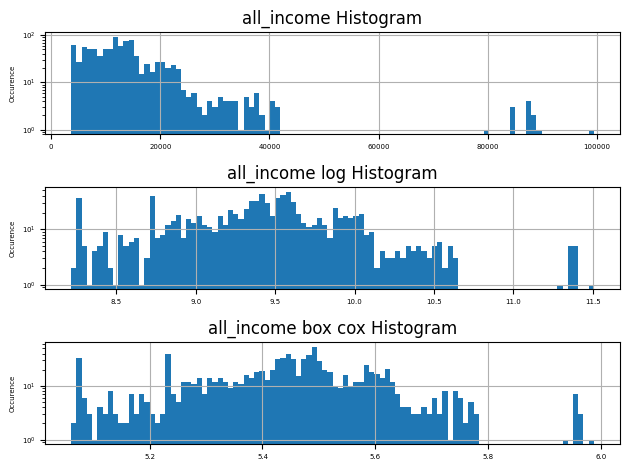

In [160]:
train_ = pd.read_csv('data/Train.csv')

cai_log = stats.boxcox(train['all_income'], lmbda=0) # log transformation
cai_bc, cai_params = stats.boxcox(train['all_income']) # box cox tranformation and the assigned value of lambda
train['ali_log'] = cai_log # adding the log transformation as a feature
train['ali_bc'] = cai_bc # adding the box cox transformation as a feature

fig, (ax1, ax2, ax3) = plt.subplots(3,1)

train['all_income'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=5)
ax1.set_title('all_income Histogram')
ax1.set_xlabel('')
ax1.set_ylabel('Occurence', fontsize=5)

train['ali_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=5)
ax2.set_title('all_income log Histogram')
ax2.set_xlabel('')
ax2.set_ylabel('Occurence', fontsize=5)

train['ali_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=5)
ax3.set_title('all_income box cox Histogram')
ax3.set_xlabel('')
ax3.set_ylabel('Occurence', fontsize=5)

plt.tight_layout()

In [161]:
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ai_log,ai_bc,cai_log,cai_bc,la_log,la_bc,lat_log,lat_bc,ti_log,ti_bc,Loan_Term_Category,Loan_Term_Category_Encoded,all_income,ali_log,ali_bc
1,79428,LP001448,1,1,0,0,0,150,3858.458782,188,370,1,1,0,6000,5.010635,11.148899,8.258023,8.098014,5.236442,2.788539,5.913503,5.426780e+07,5.010635,11.148899,Long-Term,0,10008.458782,9.211186,5.383859
2,70497,LP002231,0,0,0,0,0,4989,315.472511,17,348,1,0,0,6000,8.514991,36.369023,5.754072,5.676078,2.833213,1.973950,5.852202,4.457749e+07,8.514991,36.369023,Long-Term,0,11304.472511,9.332954,5.420583
28,55554,LP002187,1,0,2,0,0,13464,1.000000,146,367,0,1,0,6000,9.507775,49.444762,0.000000,0.000000,4.983607,2.725724,5.905362,5.286850e+07,9.507775,49.444762,Long-Term,0,19465.000000,9.876373,5.577604
43,51055,LP002585,1,1,1,0,0,5214,1.000000,40,361,1,0,0,6000,8.559103,36.874682,0.000000,0.000000,3.688879,2.326553,5.888878,5.014475e+07,8.559103,36.874682,Long-Term,0,11215.000000,9.325007,5.418204
50,82924,LP002368,1,1,0,0,0,8279,1.000000,50,372,1,1,0,3750,9.021477,42.576755,0.000000,0.000000,3.912023,2.405767,5.918894,5.521471e+07,9.021477,42.576755,Long-Term,0,12030.000000,9.395159,5.439121


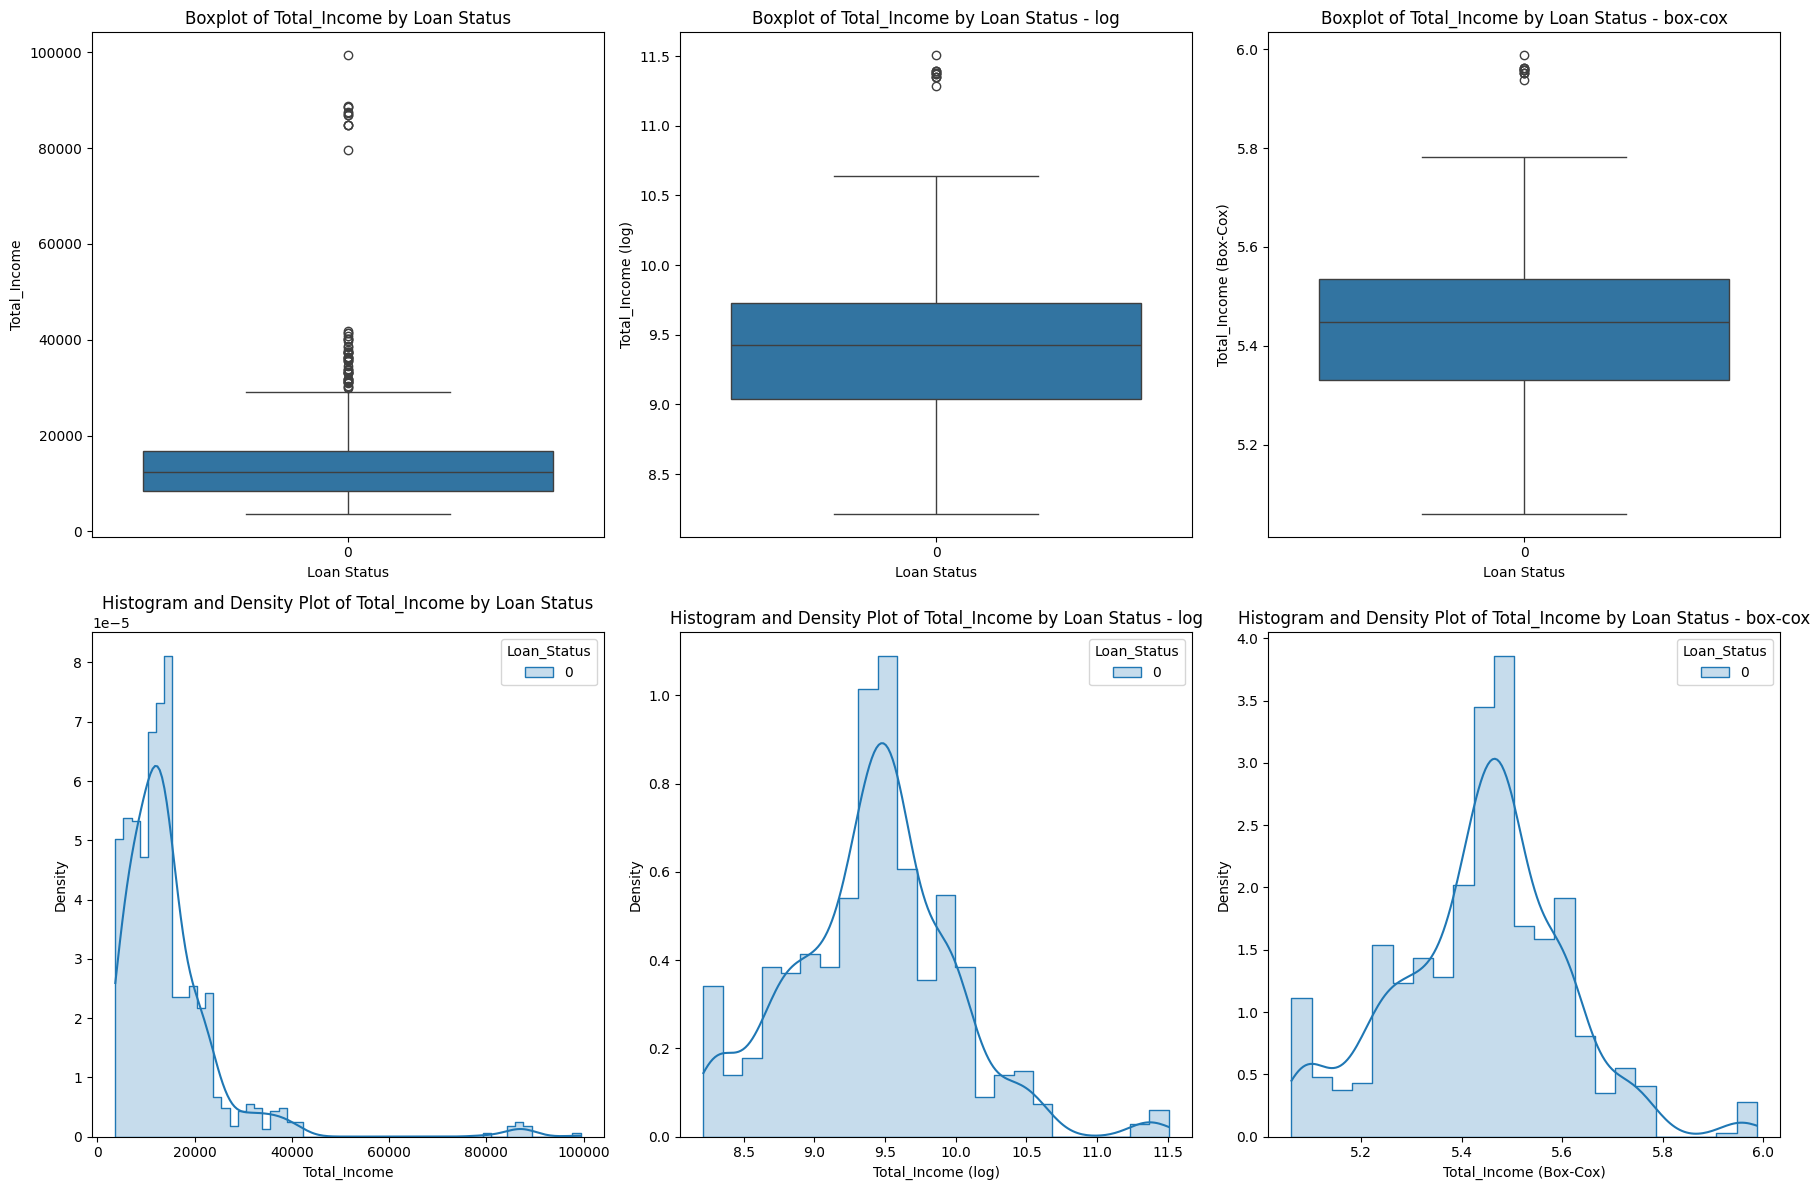

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Boxplot of Loan_Amount_Term by Loan_Status
sns.boxplot(x='Loan_Status', y='all_income', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Total_Income by Loan Status')
axes[0, 0].set_xlabel('Loan Status')
axes[0, 0].set_ylabel('Total_Income')

# Boxplot of Loan_Amount_Term by Loan_Status - log
sns.boxplot(x='Loan_Status', y='ali_log', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Total_Income by Loan Status - log')
axes[0, 1].set_xlabel('Loan Status')
axes[0, 1].set_ylabel('Total_Income (log)')

# Boxplot of Loan_Amount_Term by Loan_Status - box-cox
sns.boxplot(x='Loan_Status', y='ali_bc', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of Total_Income by Loan Status - box-cox')
axes[0, 2].set_xlabel('Loan Status')
axes[0, 2].set_ylabel('Total_Income (Box-Cox)')

# Histogram and density plot for Loan_Amount_Term by Loan_Status
sns.histplot(data=train, x='all_income', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 0])
axes[1, 0].set_title('Histogram and Density Plot of Total_Income by Loan Status')
axes[1, 0].set_xlabel('Total_Income')
axes[1, 0].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - log
sns.histplot(data=train, x='ali_log', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 1])
axes[1, 1].set_title('Histogram and Density Plot of Total_Income by Loan Status - log')
axes[1, 1].set_xlabel('Total_Income (log)')
axes[1, 1].set_ylabel('Density')

# Histogram and density plot for Loan_Amount_Term by Loan_Status - box-cox
sns.histplot(data=train, x='ali_bc', hue='Loan_Status', kde=True, element='step', stat='density', ax=axes[1, 2])
axes[1, 2].set_title('Histogram and Density Plot of Total_Income by Loan Status - box-cox')
axes[1, 2].set_xlabel('Total_Income (Box-Cox)')
axes[1, 2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [163]:
bins = [0, 3000, 7000, float('inf')]
labels = ['Low', 'Medium', 'High']
train['Income_Category'] = pd.cut(train['Total_Income'], bins=bins, labels=labels)


In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 5896
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          985 non-null    int64   
 1   Loan_ID                     985 non-null    object  
 2   Gender                      985 non-null    int64   
 3   Married                     985 non-null    int64   
 4   Dependents                  985 non-null    object  
 5   Education                   985 non-null    int64   
 6   Self_Employed               985 non-null    int64   
 7   ApplicantIncome             985 non-null    int64   
 8   CoapplicantIncome           985 non-null    float64 
 9   LoanAmount                  985 non-null    int64   
 10  Loan_Amount_Term            985 non-null    int64   
 11  Credit_History              985 non-null    int64   
 12  Property_Area               985 non-null    int64   
 13  Loan_Status             

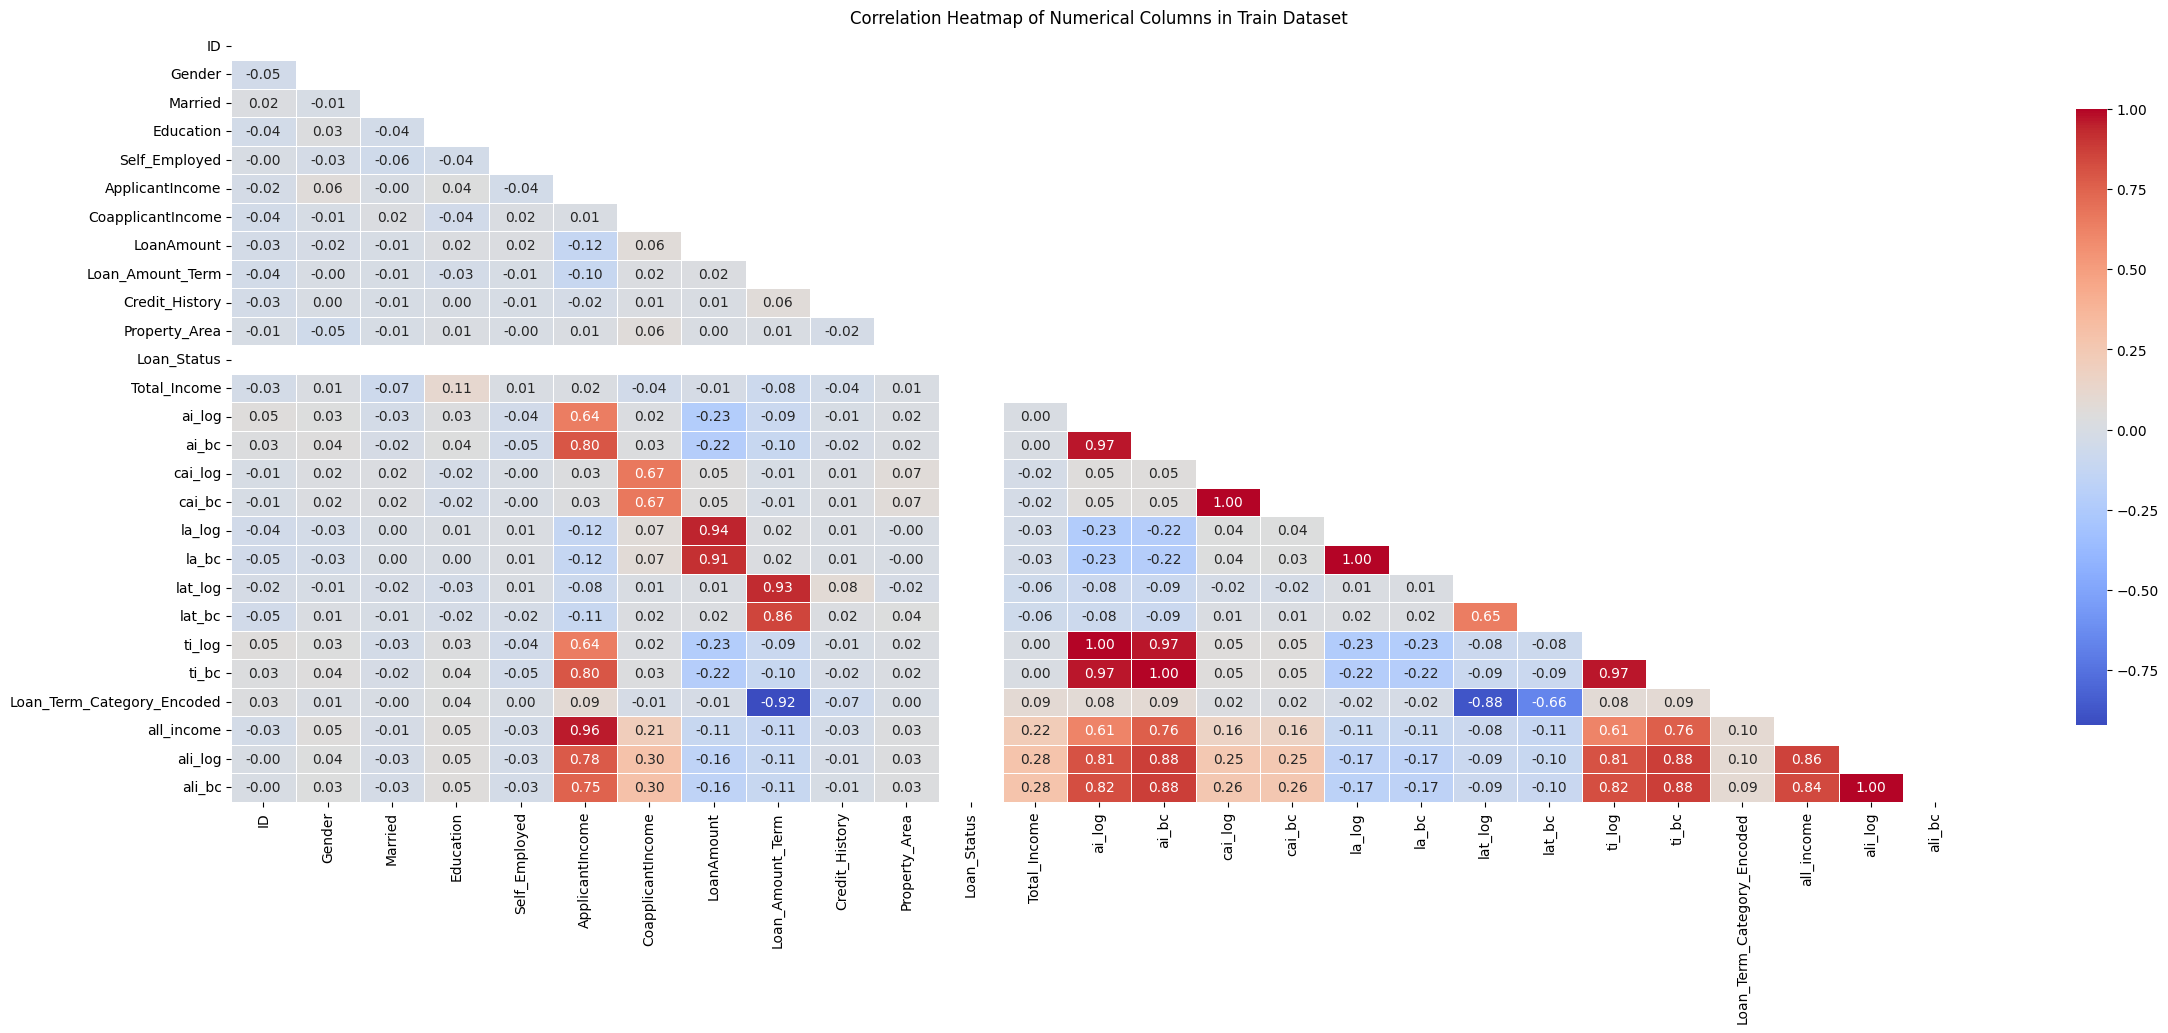

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Select only the numerical columns
numerical_train = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numerical columns
corr_matrix = numerical_train.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(28, 10))

# Create the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5, cbar_kws={'shrink': .8})

# Add title
plt.title('Correlation Heatmap of Numerical Columns in Train Dataset')

# Show the plot
plt.show()


In [166]:
corr_matrix['Loan_Status']

ID                           NaN
Gender                       NaN
Married                      NaN
Education                    NaN
Self_Employed                NaN
ApplicantIncome              NaN
CoapplicantIncome            NaN
LoanAmount                   NaN
Loan_Amount_Term             NaN
Credit_History               NaN
Property_Area                NaN
Loan_Status                  NaN
Total_Income                 NaN
ai_log                       NaN
ai_bc                        NaN
cai_log                      NaN
cai_bc                       NaN
la_log                       NaN
la_bc                        NaN
lat_log                      NaN
lat_bc                       NaN
ti_log                       NaN
ti_bc                        NaN
Loan_Term_Category_Encoded   NaN
all_income                   NaN
ali_log                      NaN
ali_bc                       NaN
Name: Loan_Status, dtype: float64

In [71]:
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ai_log,ai_bc,cai_log,cai_bc,la_log,la_bc,lat_log,lat_bc,ti_log,ti_bc,Loan_Term_Category,Loan_Term_Category_Encoded,all_income,ali_log,ali_bc,Income_Category
0,74768,LP002231,1,1,0,1,0,8328,1.000000,17,363,1,2,1,6000,9.027379,53.423504,0.000000,0.000000,2.833213,2.035413,5.894403,5.072961e+07,9.027379,53.423504,Long-Term,0,14329.000000,9.570041,6.891336,Medium
1,79428,LP001448,1,1,0,0,0,150,3858.458782,188,370,1,1,0,6000,5.010635,12.450427,8.258023,7.618980,5.236442,2.932417,5.913503,5.393490e+07,5.010635,12.450427,Long-Term,0,10008.458782,9.211186,6.710256,Medium
2,70497,LP002231,0,0,0,0,0,4989,315.472511,17,348,1,0,0,6000,8.514991,44.845575,5.754072,5.438765,2.833213,2.035413,5.852202,4.430702e+07,8.514991,44.845575,Long-Term,0,11304.472511,9.332954,6.772232,Medium
3,87480,LP001385,1,1,0,0,0,150,1.000000,232,359,1,1,1,3750,5.010635,12.450427,0.000000,0.000000,5.446737,2.988365,5.883322,4.895820e+07,5.010635,12.450427,Long-Term,0,3901.000000,8.268988,6.211663,Medium
4,33964,LP002231,1,1,1,0,0,8059,1.000000,17,372,1,0,1,3750,8.994545,52.830498,0.000000,0.000000,2.833213,2.035413,5.918894,5.487567e+07,8.994545,52.830498,Long-Term,0,11810.000000,9.376702,6.794365,Medium


In [72]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [167]:
def preprocess_data(train, test, resampling_method='SMOTE'):
    """
    Preprocesses train and test datasets with options for different resampling methods.
    
    Parameters:
        train (DataFrame): Training dataset.
        test (DataFrame): Testing dataset.
        resampling_method (str): Resampling technique to use for handling class imbalance.
                                 Options: 'SMOTE', 'ADASYN', 'Borderline-SMOTE', 'SMOTEENN', 'SMOTETomek'.
    
    Returns:
        X_train_res (array): Resampled training features.
        y_train_res (array): Resampled training labels.
        X_test (array): Scaled testing features.
        y_test (array): Original testing labels.
        test_scaled (array): Scaled test dataset features.
    """
    # Step 1: Drop the 'Loan_ID' column
    train = train.drop('Loan_ID', axis=1)
    test = test.drop('Loan_ID', axis=1)

    # Step 2: Replace '3+' with 3 in the 'Dependents' column
    train['Dependents'] = train['Dependents'].replace('3+', '3')
    test['Dependents'] = test['Dependents'].replace('3+', '3')

    # Step 3: Convert 'Dependents' to numeric datatype
    train['Dependents'] = pd.to_numeric(train['Dependents'])
    test['Dependents'] = pd.to_numeric(test['Dependents'])

    # Handle missing values before transformations
    numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']
    for col in numeric_cols:
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(test[col].median(), inplace=True)

    categorical_cols = ['Credit_History', 'Self_Employed', 'Education', 'Property_Area']
    for col in categorical_cols:
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)

    # Ensure no NaN values remain in the dataset
    train.fillna(0, inplace=True)
    test.fillna(0, inplace=True)

    # Step 4-8: Apply transformations
    train['Log_ApplicantIncome'] = np.log1p(train['ApplicantIncome'])
    test['Log_ApplicantIncome'] = np.log1p(test['ApplicantIncome'])

    train['Log_CoapplicantIncome'] = np.log1p(train['CoapplicantIncome'])
    test['Log_CoapplicantIncome'] = np.log1p(test['CoapplicantIncome'])

    train['Log_LoanAmount'] = np.log1p(train['LoanAmount'])
    test['Log_LoanAmount'] = np.log1p(test['LoanAmount'])

    train['Loan_Amount_Term'] = train['Loan_Amount_Term'].replace(0, train['Loan_Amount_Term'].median())
    test['Loan_Amount_Term'] = test['Loan_Amount_Term'].replace(0, test['Loan_Amount_Term'].median())

    train['BoxCox_Loan_Amount_Term'], lam = boxcox(train['Loan_Amount_Term'])
    test['BoxCox_Loan_Amount_Term'] = boxcox(test['Loan_Amount_Term'], lmbda=lam)

    train['Log_Total_Income'] = np.log1p(train['Total_Income'])
    test['Log_Total_Income'] = np.log1p(test['Total_Income'])

    # # Drop unnecessary columns
    # train = train.drop(['Gender', 'Married'], axis=1)
    # test = test.drop(['Gender', 'Married'], axis=1)

    # Create interaction features
    for df in [train, test]:
        df['Loan_to_Income_Ratio'] = df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome'] + 1e-6)
        df['Dependents_Credit_History_Interaction'] = df['Dependents'] * df['Credit_History']
        df['Income_LoanAmount_Interaction'] = df['Total_Income'] * df['LoanAmount']
        df['Credit_History_LoanAmount'] = df['Credit_History'] * df['LoanAmount']
        df['Credit_History_Income_Interaction'] = df['Credit_History'] * df['Total_Income']
        df['loan_to_income_ratio'] = df['LoanAmount'] / (df['Total_Income'] + 1e-6)
        df['income_per_year_emp'] = df['ApplicantIncome'] / df['Loan_Amount_Term']
        df['Income_per_Dependent'] = df['Total_Income'] / (df['Dependents'] + 1)
        df['Coapplicant_Income_Ratio'] = df['CoapplicantIncome'] / df['Total_Income']
        df['Applicant_Income_Ratio'] = df['ApplicantIncome'] / df['Total_Income']
        df['TotalIncome_LoanAmount_Ratio'] = df['Total_Income'] / (df['LoanAmount'] + 1e-6)
        df['LoanAmount_per_Term'] = df['LoanAmount'] / (df['Loan_Amount_Term'] + 1e-6)
        df['CreditHistory_LoanTerm_Interaction'] = df['Credit_History'] * df['Loan_Amount_Term']
        df['Education_LoanAmount_Interaction'] = df['Education'] * df['LoanAmount']
        df['SelfEmployed_Income_Interaction'] = df['Self_Employed'] * df['Total_Income']
        df['LoanAmount_to_Term_Ratio'] = df['LoanAmount'] / (df['Loan_Amount_Term'] + 1e-6)
        df['EMI'] = df['LoanAmount'] / (df['Loan_Amount_Term'] + 1e-6)
        df['EMI_to_Income_Ratio'] = df['EMI'] / df['Total_Income']
        df['ApplicantIncome_Squared'] = df['ApplicantIncome'] ** 2
        df['Log_LoanAmount_per_Term'] = np.log1p(df['LoanAmount_per_Term'])
        df['Debt_to_Income_Ratio'] = df['LoanAmount'] / (df['Total_Income'] + 1e-6)
        df['Dependents_TotalIncome_Interaction'] = df['Dependents'] * df['Total_Income']
        df['Dependents_LoanAmount_Interaction'] = df['Dependents'] * df['LoanAmount']
        df['LoanAmount_Squared'] = df['LoanAmount'] ** 2
        df['Income_per_Dependent'] = df['Total_Income'] / (df['Dependents'] + 1)
        df['LoanAmount_per_Term'] = df['LoanAmount'] / (df['Loan_Amount_Term'] + 1e-6)
        df['EMI'] = df['LoanAmount'] / (df['Loan_Amount_Term'] + 1e-6)
        df['EMI_to_Income_Ratio'] = df['EMI'] / df['Total_Income']

    # Step 5: Bin continuous features
    binning_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']
    for feature in binning_features:
        train[f'{feature}_Bin'] = pd.qcut(train[feature], q=5, labels=False, duplicates='drop')
        test[f'{feature}_Bin'] = pd.qcut(test[feature], q=5, labels=False, duplicates='drop')



    return train, test


In [168]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

def preprocess_data(train, test):
    """
    Preprocesses train and test datasets with streamlined transformations and appropriate resampling.
    
    Parameters:
        train (DataFrame): Training dataset.
        test (DataFrame): Testing dataset.
        resampling_method (str): Resampling technique to handle class imbalance.
                                 Options: 'SMOTE', 'ADASYN', 'Borderline-SMOTE', 'SMOTEENN', 'SMOTETomek'.
    
    Returns:
        X_train_res (array): Resampled training features.
        y_train_res (array): Resampled training labels.
        X_test (array): Scaled testing features.
        y_test (array): Original testing labels.
        test_scaled (array): Scaled test dataset features.
    """
    # Step 1: Label encode 'Loan_ID' instead of dropping
    all_ids = pd.concat([train['Loan_ID'], test['Loan_ID']])
    id_mapping = {val: idx for idx, val in enumerate(all_ids.unique())}
    train['Loan_ID'] = train['Loan_ID'].map(id_mapping)
    test['Loan_ID'] = test['Loan_ID'].map(id_mapping)

    # Step 2: Replace '3+' with 3 in 'Dependents'
    train['Dependents'] = train['Dependents'].replace('3+', 3).astype(float)
    test['Dependents'] = test['Dependents'].replace('3+', 3).astype(float)

    # Step 3: Handle missing values
    numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']
    for col in numeric_cols:
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(test[col].median(), inplace=True)

    categorical_cols = ['Credit_History', 'Self_Employed', 'Education', 'Property_Area', 'Gender', 'Married']
    for col in categorical_cols:
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)

    # Ensure no NaN values remain in the dataset
    train.fillna(0, inplace=True)
    test.fillna(0, inplace=True)

    # Step 4: Add feature interactions with descriptive headers
    for df in [train, test]:
        # Basic interactions
        df['Loan_to_Income_Ratio'] = df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome'] + 1e-6)
        df['Income_per_Dependent'] = df['Total_Income'] / (df['Dependents'] + 1)
        df['LoanAmount_per_Term'] = df['LoanAmount'] / (df['Loan_Amount_Term'] + 1e-6)
        df['EMI'] = df['LoanAmount'] / (df['Loan_Amount_Term'] + 1e-6)
        df['EMI_to_Income_Ratio'] = df['EMI'] / df['Total_Income']
        df['Debt_to_Income_Ratio'] = df['LoanAmount'] / (df['Total_Income'] + 1e-6)
        df['all_income'] = df['ApplicantIncome'] + df['CoapplicantIncome'] + df['Total_Income']
        df['loan_to_all_income_ratio'] = df['LoanAmount'] / df['all_income']
        df['all_Income_per_Dependent'] = df['all_income'] / (df['Dependents'] + 1)

        # Additional interactions
        df['Dependents_Credit_History_Interaction'] = df['Dependents'] * df['Credit_History']
        df['Income_LoanAmount_Interaction'] = df['Total_Income'] * df['LoanAmount']
        df['all_Income_LoanAmount_Interaction'] = df['all_income'] * df['LoanAmount']
        df['Credit_History_LoanAmount'] = df['Credit_History'] * df['LoanAmount']
        df['Credit_History_Income_Interaction'] = df['Credit_History'] * df['Total_Income']
        df['Credit_History_all_Income_Interaction'] = df['Credit_History'] * df['all_income']
        df['loan_to_income_ratio'] = df['LoanAmount'] / (df['Total_Income'] + 1e-6)
        df['income_per_year_emp'] = df['ApplicantIncome'] / (df['Loan_Amount_Term'] + 1e-6)
        df['coapplicant_income_per_year_emp'] = df['CoapplicantIncome'] / (df['Loan_Amount_Term'] + 1e-6)
        df['all_income_per_year_emp'] = df['all_income'] / (df['Loan_Amount_Term'] + 1e-6)
        df['Coapplicant_Income_Ratio'] = df['CoapplicantIncome'] / df['Total_Income']
        df['Applicant_Income_Ratio'] = df['ApplicantIncome'] / df['Total_Income']
        df['TotalIncome_LoanAmount_Ratio'] = df['Total_Income'] / (df['LoanAmount'] + 1e-6)
        df['all_Income_LoanAmount_Ratio'] = df['all_income'] / (df['LoanAmount'] + 1e-6)
        df['CreditHistory_LoanTerm_Interaction'] = df['Credit_History'] * df['Loan_Amount_Term']
        df['Education_LoanAmount_Interaction'] = df['Education'] * df['LoanAmount']
        df['SelfEmployed_Income_Interaction'] = df['Self_Employed'] * df['Total_Income']

        # Squared and log-transformed features
        df['ApplicantIncome_Squared'] = df['ApplicantIncome'] ** 2
        df['all_income_Squared'] = df['all_income'] ** 2
        df['LoanAmount_Squared'] = df['LoanAmount'] ** 2
        df['Log_LoanAmount_per_Term'] = np.log1p(df['LoanAmount_per_Term'])

        # Dependents and loan-based interactions
        df['Dependents_TotalIncome_Interaction'] = df['Dependents'] * df['Total_Income']
        df['Dependents_LoanAmount_Interaction'] = df['Dependents'] * df['LoanAmount']
        df['LoanAmount_to_Term_Ratio'] = df['LoanAmount'] / (df['Loan_Amount_Term'] + 1e-6)

        # Feature interactions with Gender and Married
        df['Gender_ApplicantIncome'] = df['Gender'] * df['ApplicantIncome']
        df['Married_CoapplicantIncome'] = df['Married'] * df['CoapplicantIncome']
        df['Married_Total_Income'] = df['Married'] * df['Total_Income']
        df['Gender_Married_Interaction'] = df['Gender'] * df['Married']

        # Loan_ID-derived interactions
        df['Loan_ID_Dependents_Interaction'] = df['Loan_ID'] * df['Dependents']
        df['Loan_ID_Income_Interaction'] = df['Loan_ID'] * df['Total_Income']
        df['Loan_ID_LoanAmount_Interaction'] = df['Loan_ID'] * df['LoanAmount']


    # Step 5: Bin continuous features
    binning_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']
    for feature in binning_features:
        train[f'{feature}_Bin'] = pd.qcut(train[feature], q=5, labels=False, duplicates='drop')
        test[f'{feature}_Bin'] = pd.qcut(test[feature], q=5, labels=False, duplicates='drop')


    return train, test


In [170]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

train = train[train['Loan_Status'] == 0]

In [171]:
train, test = preprocess_data(train, test)

In [172]:
train.isna().sum()

ID                                       0
Loan_ID                                  0
Gender                                   0
Married                                  0
Dependents                               0
Education                                0
Self_Employed                            0
ApplicantIncome                          0
CoapplicantIncome                        0
LoanAmount                               0
Loan_Amount_Term                         0
Credit_History                           0
Property_Area                            0
Loan_Status                              0
Total_Income                             0
Loan_to_Income_Ratio                     0
Income_per_Dependent                     0
LoanAmount_per_Term                      0
EMI                                      0
EMI_to_Income_Ratio                      0
Debt_to_Income_Ratio                     0
all_income                               0
loan_to_all_income_ratio                 0
all_Income_

In [173]:
test.isna().sum()

ID                                       0
Loan_ID                                  0
Gender                                   0
Married                                  0
Dependents                               0
Education                                0
Self_Employed                            0
ApplicantIncome                          0
CoapplicantIncome                        0
LoanAmount                               0
Loan_Amount_Term                         0
Credit_History                           0
Property_Area                            0
Total_Income                             0
Loan_to_Income_Ratio                     0
Income_per_Dependent                     0
LoanAmount_per_Term                      0
EMI                                      0
EMI_to_Income_Ratio                      0
Debt_to_Income_Ratio                     0
all_income                               0
loan_to_all_income_ratio                 0
all_Income_per_Dependent                 0
Dependents_

## Feature Selection

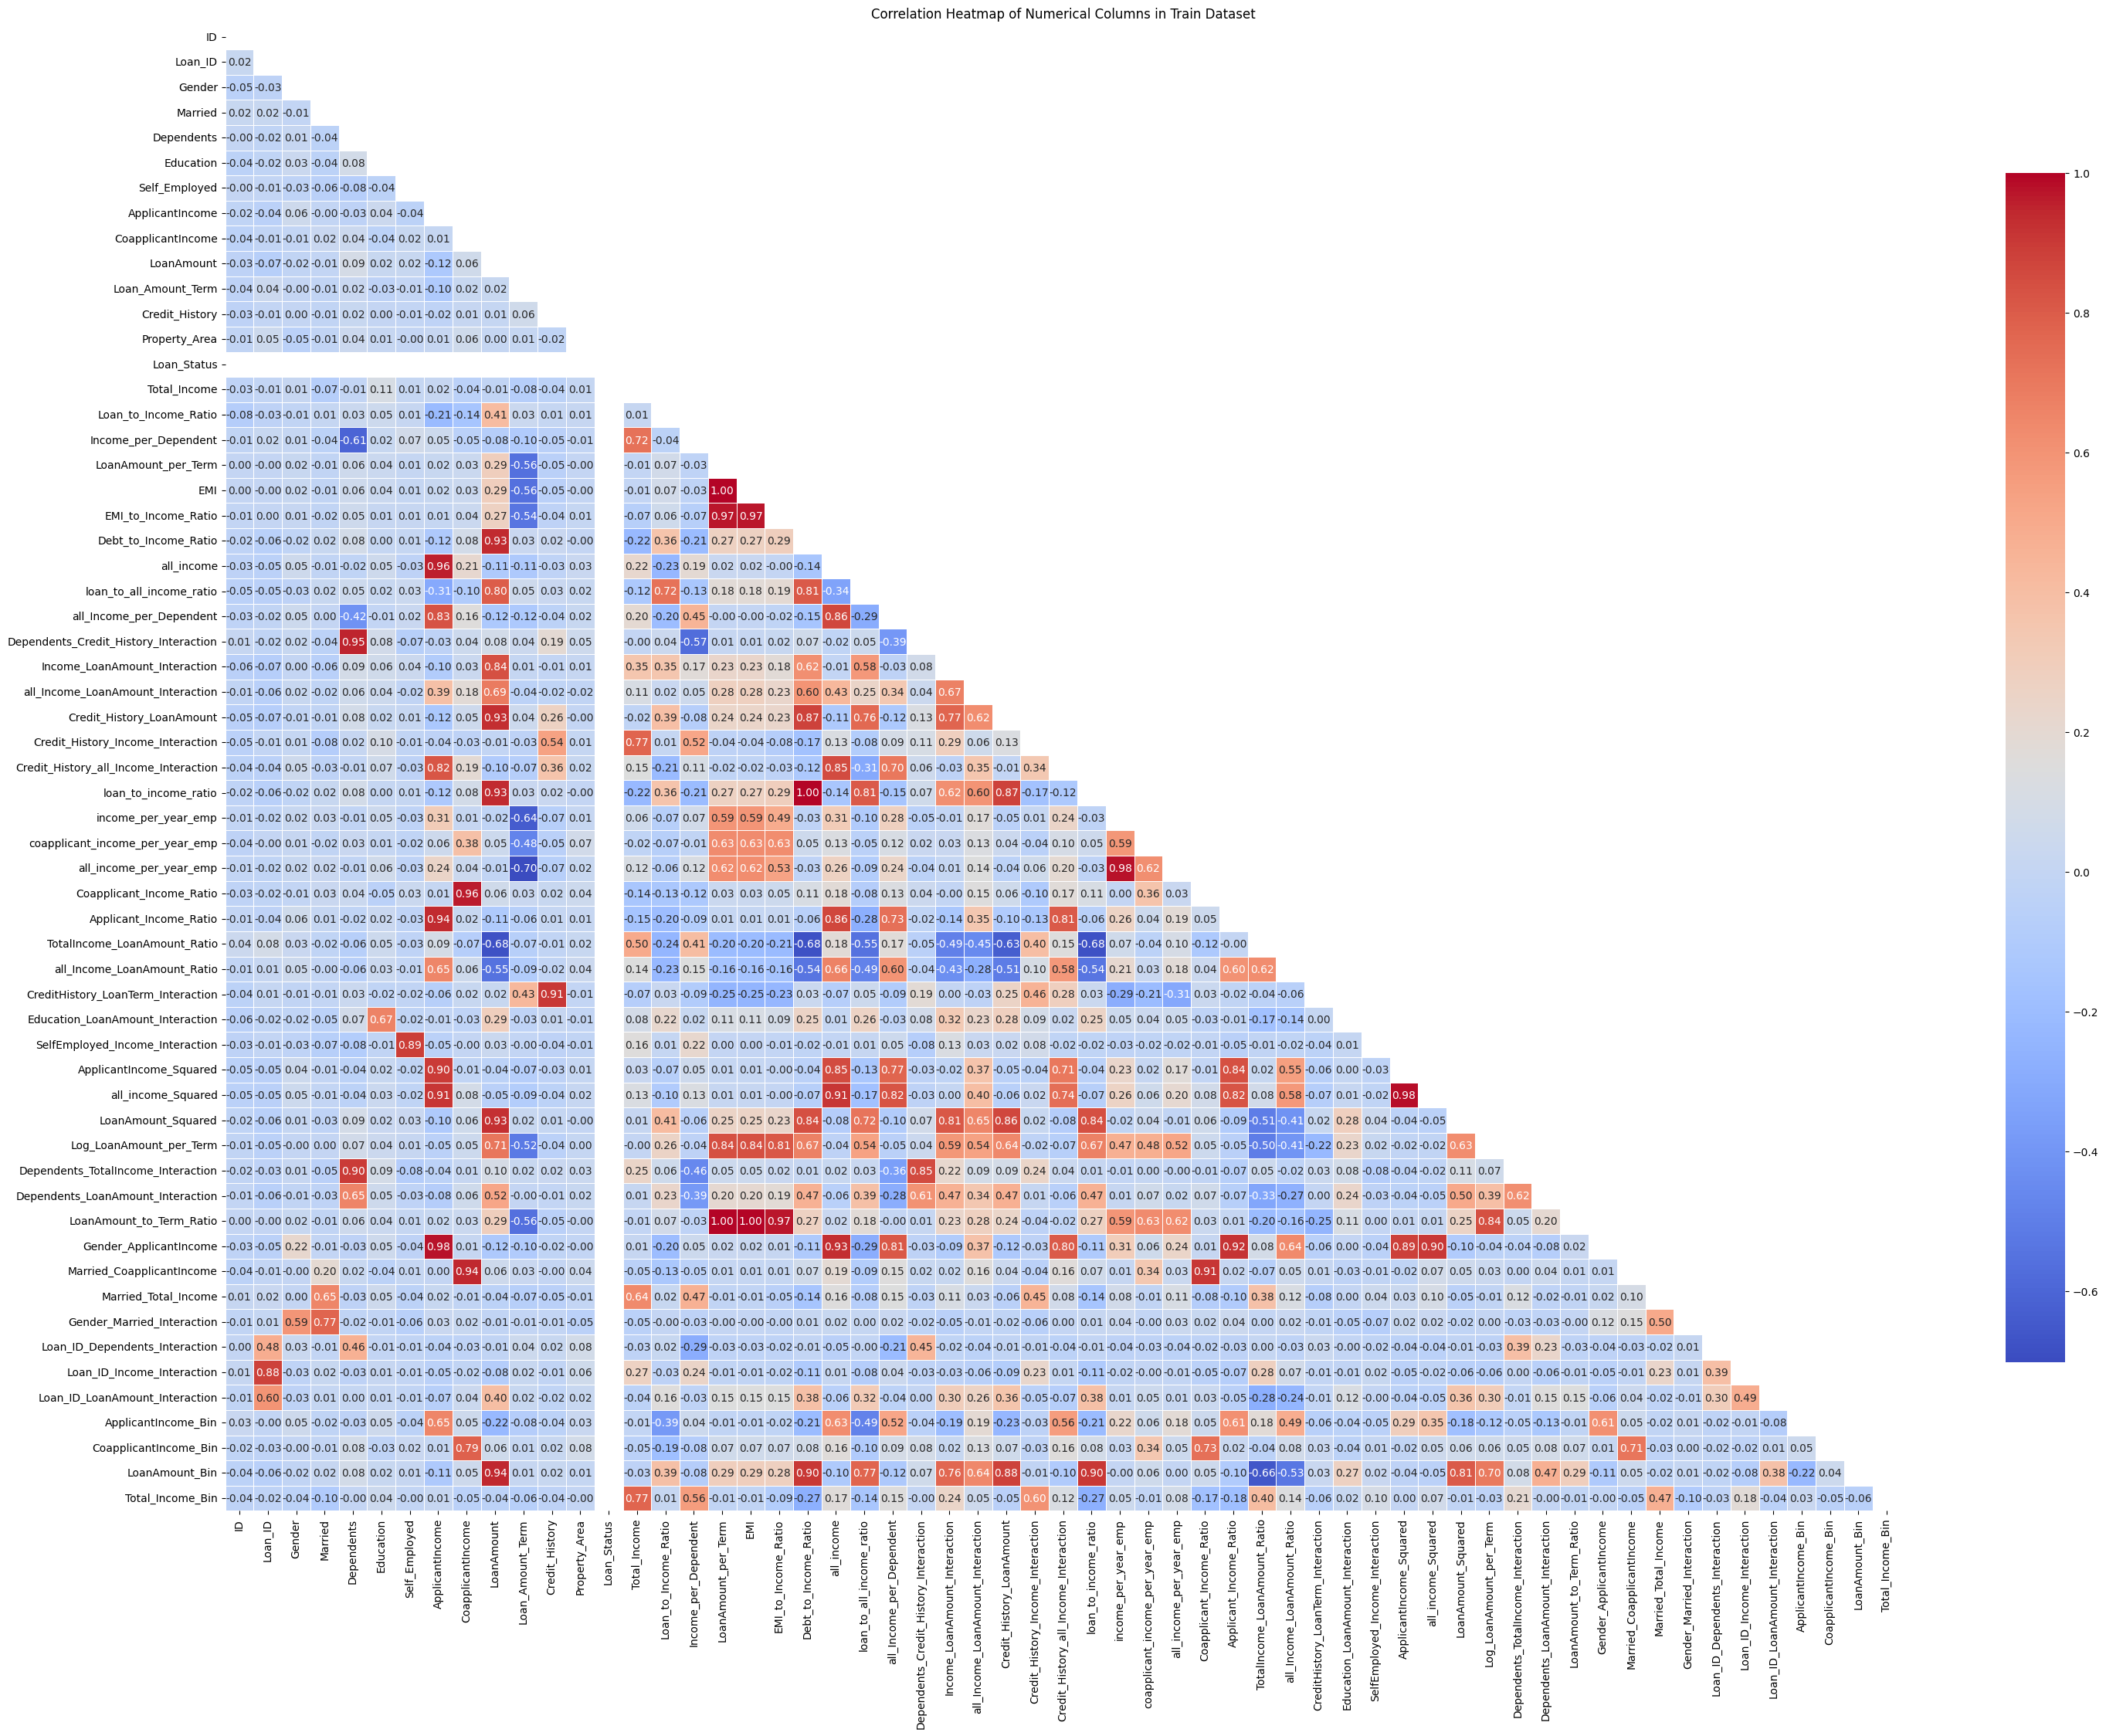

In [176]:
# Calculate the correlation matrix for the numerical columns
corr_matrix = train.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(35, 25))

# Create the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5, cbar_kws={'shrink': .8})

# Add title
plt.title('Correlation Heatmap of Numerical Columns in Train Dataset')

# Show the plot
plt.show()

In [178]:
df_corr = train.corr()

In [181]:
df_corr['Loan_Status']

ID                                      NaN
Loan_ID                                 NaN
Gender                                  NaN
Married                                 NaN
Dependents                              NaN
Education                               NaN
Self_Employed                           NaN
ApplicantIncome                         NaN
CoapplicantIncome                       NaN
LoanAmount                              NaN
Loan_Amount_Term                        NaN
Credit_History                          NaN
Property_Area                           NaN
Loan_Status                             NaN
Total_Income                            NaN
Loan_to_Income_Ratio                    NaN
Income_per_Dependent                    NaN
LoanAmount_per_Term                     NaN
EMI                                     NaN
EMI_to_Income_Ratio                     NaN
Debt_to_Income_Ratio                    NaN
all_income                              NaN
loan_to_all_income_ratio        

In [179]:
low_correlation_columns = []

for i in df_corr.index:
    if -0.01 <= df_corr['Loan_Status'][i] <= 0.01:
        low_correlation_columns.append(i)

low_correlation_columns

[]

In [224]:
train.drop(low_correlation_columns, axis=1, inplace=True)
test.drop(low_correlation_columns, axis=1, inplace=True)

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF
features = train.drop(columns=["Loan_Status"])  # Drop target column
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
print(vif_data)


                                  Feature         VIF
0                                      ID    4.842348
1                                 Loan_ID    8.117491
2                              Dependents   24.612407
3                               Education    1.139269
4                              LoanAmount   52.439004
5                           Property_Area    3.414744
6                    Income_per_Dependent   11.224850
7                     LoanAmount_per_Term         inf
8                                     EMI         inf
9                     EMI_to_Income_Ratio   25.890093
10                   Debt_to_Income_Ratio         inf
11                             all_income   47.071550
12               loan_to_all_income_ratio    7.029018
13  Dependents_Credit_History_Interaction   14.429157
14              Credit_History_LoanAmount   15.357644
15                   loan_to_income_ratio         inf
16                    income_per_year_emp   34.138202
17        coapplicant_income

In [189]:
# Create X
X = train.drop('Loan_Status', axis=1)

# Set VIF threshold
vif_threshold = 5

# Iteratively remove features with high VIF
def calculate_vif(X, thresh=vif_threshold):
    variables = list(X.columns)
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X[variables].values, variables.index(var)) for var in variables]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping {variables[maxloc]} with VIF {max_vif}")
            variables.pop(maxloc)
            dropped = True
    print("Remaining variables:")
    print(variables)
    return X[variables]

X_selected = calculate_vif(X)



Dropping LoanAmount_per_Term with VIF inf
Dropping EMI with VIF inf
Dropping Debt_to_Income_Ratio with VIF inf
Dropping all_income_Squared with VIF 108.64501388793119
Dropping LoanAmount with VIF 52.43162362285341
Dropping all_income_per_year_emp with VIF 41.98900619477671
Dropping all_income with VIF 37.526574344594735
Dropping LoanAmount_to_Term_Ratio with VIF 24.61973682740061
Dropping Dependents with VIF 23.786459325938285
Dropping loan_to_income_ratio with VIF 13.643098942990138
Dropping Loan_ID with VIF 7.540648327605153
Dropping Credit_History_LoanAmount with VIF 7.529872123250094
Dropping Dependents_Credit_History_Interaction with VIF 5.872018304683391
Remaining variables:
['ID', 'Education', 'Property_Area', 'Income_per_Dependent', 'EMI_to_Income_Ratio', 'loan_to_all_income_ratio', 'income_per_year_emp', 'coapplicant_income_per_year_emp', 'Coapplicant_Income_Ratio', 'ApplicantIncome_Squared', 'LoanAmount_Squared', 'Dependents_TotalIncome_Interaction', 'Dependents_LoanAmount_In

In [190]:
X_selected['Loan_Status'] = train['Loan_Status']
train = train[X_selected.columns]
test_selected = X_selected.drop('Loan_Status', axis=1)
test = test[test_selected.columns]

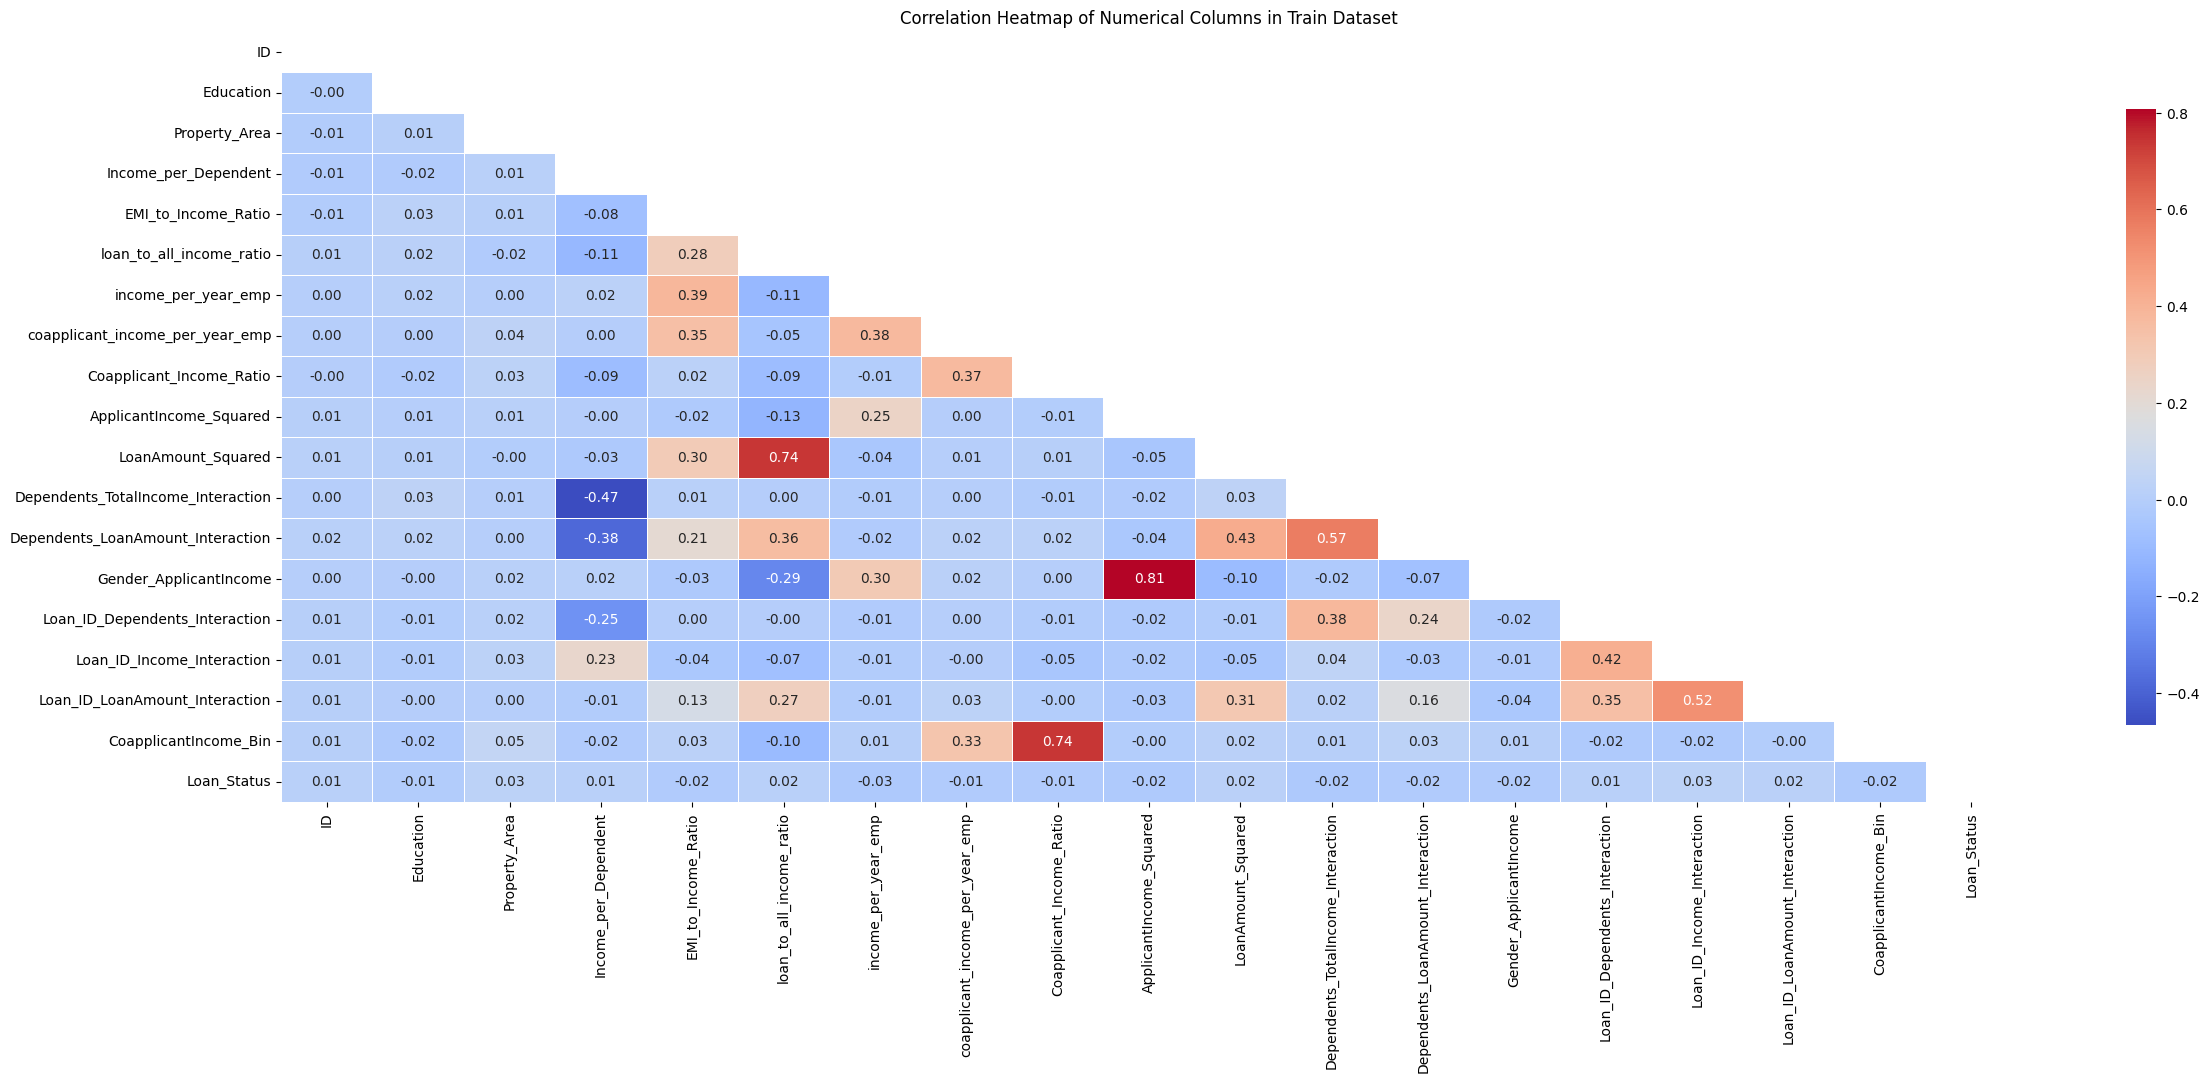

In [191]:
# Calculate the correlation matrix for the numerical columns
corr_matrix = train.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(28, 10))

# Create the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5, cbar_kws={'shrink': .8})

# Add title
plt.title('Correlation Heatmap of Numerical Columns in Train Dataset')

# Show the plot
plt.show()

In [242]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

# Helper function for oversampling
def resample_minority_class(X, y):
    # Concatenate X and y for resampling
    data = pd.concat([X, y], axis=1)
    minority_class = data[y.name].value_counts().idxmin()  # Find the minority class
    minority_data = data[data[y.name] == minority_class]
    majority_data = data[data[y.name] != minority_class]

    # Oversample the minority class
    minority_upsampled = resample(minority_data,
                                  replace=True,  # Sample with replacement
                                  n_samples=len(majority_data),  # Match majority class size
                                  random_state=42)

    # Combine majority data with upsampled minority data
    upsampled_data = pd.concat([majority_data, minority_upsampled])

    return upsampled_data.drop(columns=[y.name]), upsampled_data[y.name]

# Helper function for undersampling
def resample_majority_class(X, y):
    # Concatenate X and y for resampling
    data = pd.concat([X, y], axis=1)
    minority_class = data[y.name].value_counts().idxmin()  # Find the minority class
    minority_data = data[data[y.name] == minority_class]
    majority_data = data[data[y.name] != minority_class]

    # Undersample the majority class
    majority_downsampled = resample(majority_data,
                                    replace=False,  # Sample without replacement
                                    n_samples=len(minority_data),  # Match minority class size
                                    random_state=42)

    # Combine minority data with downsampled majority data
    downsampled_data = pd.concat([minority_data, majority_downsampled])

    return downsampled_data.drop(columns=[y.name]), downsampled_data[y.name]

# Main function for resampling and scaling
def resample_split(train, test, resampling_method='SMOTE', scaling_option=None):
    # Step 1: Create X and y
    X = train.drop('Loan_Status', axis=1)
    y = train['Loan_Status']
    test = test.copy()

    # Step 2: Align columns between train and test
    X, test = X.align(test, join='left', axis=1, fill_value=0)

    # Step 3: Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

    # Step 4: Handle class imbalance
    if resampling_method == 'SMOTE':
        resampler = SMOTE(random_state=42)
        X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)
    elif resampling_method == 'ADASYN':
        resampler = ADASYN(random_state=42)
        X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)
    elif resampling_method == 'Borderline-SMOTE':
        resampler = BorderlineSMOTE(random_state=42)
        X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)
    elif resampling_method == 'SMOTEENN':
        resampler = SMOTEENN(random_state=42)
        X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)
    elif resampling_method == 'SMOTETomek':
        resampler = SMOTETomek(random_state=42)
        X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)
    elif resampling_method == 'oversample':
        # Oversample the minority class
        X_train_res, y_train_res = resample_minority_class(X_train, y_train)
    elif resampling_method == 'undersample':
        # Undersample the majority class
        X_train_res, y_train_res = resample_majority_class(X_train, y_train)
    else:
        raise ValueError(f"Invalid resampling method: {resampling_method}")

    # Step 5: Scale numeric features (optional, based on model requirements)
    if scaling_option == 'standard':
        scaler = StandardScaler()
    elif scaling_option == 'minmax':
        scaler = MinMaxScaler()
    elif scaling_option == 'robust':
        scaler = RobustScaler()
    else:
        scaler = None  # No scaling

    if scaler:
        X_train_res = scaler.fit_transform(X_train_res)
        X_test = scaler.transform(X_test)
        test_scaled = scaler.transform(test)
    else:
        X_train_res = X_train_res.values
        X_test = X_test.values
        test_scaled = test.values

    return X_train_res, y_train_res, X_test, y_test, test_scaled


In [246]:
X_train_res, y_train_res, X_test, y_test, test_scaled = resample_split(train, test, resampling_method='SMOTE', scaling_option='minmax')

In [244]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators = 1000, 
                               min_samples_split= 2, 
                               min_samples_leaf = 2, 
                               max_features = 'log2', 
                               max_depth = 50, 
                               bootstrap = False,
                               class_weight='balanced')

model.fit(X_train_res, y_train_res)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"Metrics for {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label=1))  # Change 'Yes' to the positive label in your dataset
    print("Recall:", recall_score(y_true, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_true, y_pred, pos_label=1))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n" + "="*50 + "\n")

# Print metrics for test set
print_metrics(y_test, y_test_pred, "Test Set")

Metrics for Test Set:
Accuracy: 0.7805084745762711
Precision: 0.8327205882352942
Recall: 0.9216683621566633
F1 Score: 0.8749396426846934

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.08      0.10       394
           1       0.83      0.92      0.87      1966

    accuracy                           0.78      2360
   macro avg       0.50      0.50      0.49      2360
weighted avg       0.72      0.78      0.75      2360

Confusion Matrix:
 [[  30  364]
 [ 154 1812]]




In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 50, 100, None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}


In [196]:
# Create the Random Forest model
model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',  # Use an appropriate metric for your problem
    cv=5,  # Number of cross-validation folds
    verbose=2,  # Print progress messages
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)


In [237]:
# Assuming X_train and y_train are your training features and target
random_search.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=100, max_features=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'max_depth': [10, 20, 50, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [238]:
model = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000, random_state=42)


model.fit(X_train_res, y_train_res)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"Metrics for {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label=1))  # Change 'Yes' to the positive label in your dataset
    print("Recall:", recall_score(y_true, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_true, y_pred, pos_label=1))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n" + "="*50 + "\n")

# Print metrics for test set
print_metrics(y_test, y_test_pred, "Test Set")

Metrics for Test Set:
Accuracy: 0.42542372881355933
Precision: 0.7992125984251969
Recall: 0.4134419551934827
F1 Score: 0.5449664429530201

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.48      0.22        99
           1       0.80      0.41      0.54       491

    accuracy                           0.43       590
   macro avg       0.47      0.45      0.38       590
weighted avg       0.69      0.43      0.49       590

Confusion Matrix:
 [[ 48  51]
 [288 203]]




In [211]:
model = RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features='log2', min_samples_split=5,
                       n_estimators=1000, random_state=42)


model.fit(X_train_res, y_train_res)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"Metrics for {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label=1))  # Change 'Yes' to the positive label in your dataset
    print("Recall:", recall_score(y_true, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_true, y_pred, pos_label=1))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n" + "="*50 + "\n")

# Print metrics for test set
print_metrics(y_test, y_test_pred, "Test Set")

Metrics for Test Set:
Accuracy: 0.7457627118644068
Precision: 0.8285163776493256
Recall: 0.8757637474541752
F1 Score: 0.8514851485148515

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.10      0.12        99
           1       0.83      0.88      0.85       491

    accuracy                           0.75       590
   macro avg       0.48      0.49      0.48       590
weighted avg       0.71      0.75      0.73       590

Confusion Matrix:
 [[ 10  89]
 [ 61 430]]




In [236]:
model = RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       max_features='log2', min_samples_split=5,
                       n_estimators=1000, random_state=42)


model.fit(X_train_res, y_train_res)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Function to print metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"Metrics for {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label=1))  # Change 'Yes' to the positive label in your dataset
    print("Recall:", recall_score(y_true, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_true, y_pred, pos_label=1))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n" + "="*50 + "\n")

# Print metrics for test set
print_metrics(y_test, y_test_pred, "Test Set")

Metrics for Test Set:
Accuracy: 0.4711864406779661
Precision: 0.8254545454545454
Recall: 0.4623217922606925
F1 Score: 0.5926892950391645

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.52      0.25        99
           1       0.83      0.46      0.59       491

    accuracy                           0.47       590
   macro avg       0.49      0.49      0.42       590
weighted avg       0.71      0.47      0.53       590

Confusion Matrix:
 [[ 51  48]
 [264 227]]




In [ ]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

def resample_split(train, test, resampling_method='oversample', scaling_option=None):
    # Step 1: Set index for train and test
    train.set_index('ID', inplace=True)
    test.set_index('ID', inplace=True)

    # Step 2: Create X and y
    X = train.drop('Loan_Status', axis=1)
    y = train['Loan_Status']
    test = test.copy()

    # Step 3: Align columns between train and test
    X, test = X.align(test, join='left', axis=1, fill_value=0)

    # Step 4: Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

    # Step 5: Handle class imbalance
    if resampling_method == 'oversample':
        # Oversample the minority class
        X_train_res, y_train_res = resample_minority_class(X_train, y_train)
    elif resampling_method == 'undersample':
        # Undersample the majority class
        X_train_res, y_train_res = resample_majority_class(X_train, y_train)
    else:
        raise ValueError(f"Invalid resampling method: {resampling_method}")

    # Step 6: Scale numeric features (optional)
    if scaling_option == 'standard':
        scaler = StandardScaler()
    elif scaling_option == 'minmax':
        scaler = MinMaxScaler()
    elif scaling_option == 'robust':
        scaler = RobustScaler()
    else:
        scaler = None  # No scaling

    if scaler:
        X_train_res = scaler.fit_transform(X_train_res)
        X_test = scaler.transform(X_test)
        test_scaled = scaler.transform(test)
    else:
        X_train_res = X_train_res.values
        X_test = X_test.values
        test_scaled = test.values

    return X_train_res, y_train_res, X_test, y_test, test_scaled

Training XGBoost...

XGBoost Classification Report:
              precision    recall  f1-score   support

     class_0       0.18      0.11      0.13       394
     class_1       0.83      0.90      0.87      1966

    accuracy                           0.77      2360
   macro avg       0.51      0.50      0.50      2360
weighted avg       0.73      0.77      0.74      2360

Training LightGBM...
[LightGBM] [Info] Number of positive: 2947, number of negative: 2947
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6882
[LightGBM] [Info] Number of data points in the train set: 5894, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Classification Report:
              precision    recall  f1-score   support

     class_0

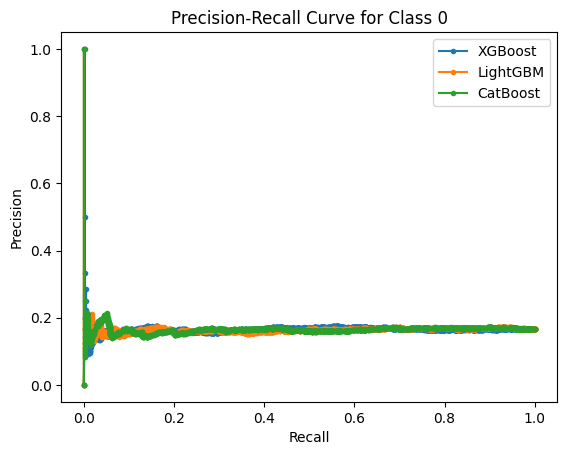


XGBoost Results:
Accuracy: 0.7694915254237288
Confusion Matrix:
[[  42  352]
 [ 192 1774]]

LightGBM Results:
Accuracy: 0.7792372881355932
Confusion Matrix:
[[  20  374]
 [ 147 1819]]

CatBoost Results:
Accuracy: 0.7838983050847458
Confusion Matrix:
[[  21  373]
 [ 137 1829]]


In [247]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Step 4: Define alternative models
# Importing model libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# XGBoost Classifier
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1]),
    random_state=42
)

# LightGBM Classifier
lgbm_model = LGBMClassifier(
    class_weight='balanced',
    random_state=42
)

# CatBoost Classifier
catboost_model = CatBoostClassifier(
    class_weights=[1, len(y_train_res[y_train_res == 1]) / len(y_train_res[y_train_res == 0])],
    random_state=42,
    verbose=0  # Suppress CatBoost logs
)

# Step 5: Train and evaluate each model
models = {
    'XGBoost': xgb_model,
    'LightGBM': lgbm_model,
    'CatBoost': catboost_model
}

# Store results
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_res, y_train_res)  # Train the model

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for precision-recall curve

    # Metrics
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['class_0', 'class_1']))

    # Save metrics
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Plot Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=0)
    plt.plot(recall, precision, marker='.', label=f'{model_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class 0')
plt.legend()
plt.show()

# Step 6: Compare results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
